# Comparing effect sizes

## Import packages

In [1]:
import sys
sys.path.insert(0,"/home/yunye/work/gwaslab/src")
import gwaslab as gl
import pandas as pd

## Download sample sumstats

In [8]:
!wget -O bbj_bmi_male.txt.gz http://jenger.riken.jp/2analysisresult_qtl_download/

!wget -O bbj_bmi_female.txt.gz http://jenger.riken.jp/4analysisresult_qtl_download/

--2023-02-05 20:54:37--  http://jenger.riken.jp/2analysisresult_qtl_download/
Resolving jenger.riken.jp (jenger.riken.jp)... 134.160.84.25
Connecting to jenger.riken.jp (jenger.riken.jp)|134.160.84.25|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 136657659 (130M) [text/plain]
Saving to: ‘bbj_bmi_male.txt.gz’

bbj_bmi_male.txt.gz 100%[===================>] 130.33M  11.1MB/s    in 12s     

2023-02-05 20:54:49 (10.9 MB/s) - ‘bbj_bmi_male.txt.gz’ saved [136657659/136657659]

--2023-02-05 20:54:49--  http://jenger.riken.jp/4analysisresult_qtl_download/
Resolving jenger.riken.jp (jenger.riken.jp)... 134.160.84.25
Connecting to jenger.riken.jp (jenger.riken.jp)|134.160.84.25|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 136645377 (130M) [text/plain]
Saving to: ‘bbj_bmi_female.txt.gz’

bbj_bmi_female.txt. 100%[===================>] 130.31M  10.2MB/s    in 12s     

2023-02-05 20:55:01 (10.7 MB/s) - ‘bbj_bmi_female.txt.gz’ saved [136645377/

## Creating comparison plot using beta and se

### use gl.Sumstats object

Fri Jun 23 00:44:28 2023 GWASLab version 3.4.15 https://cloufield.github.io/gwaslab/
Fri Jun 23 00:44:28 2023 (C) 2022-2023, Yunye He, Kamatani Lab, MIT License, gwaslab@gmail.com
Fri Jun 23 00:44:28 2023 Start to load format from formatbook....
Fri Jun 23 00:44:28 2023  -gwaslab format meta info:
Fri Jun 23 00:44:28 2023   - format_name  : gwaslab
Fri Jun 23 00:44:28 2023   - format_source  : https://cloufield.github.io/gwaslab/
Fri Jun 23 00:44:28 2023   - format_version  : 20220729_v3
Fri Jun 23 00:44:28 2023 Start to initiate from file :bbj_bmi_female.txt.gz
Fri Jun 23 00:44:34 2023  -Reading columns          : CHR,BETA,ALT,POS,SNP,P,REF,SE
Fri Jun 23 00:44:34 2023  -Renaming columns to      : CHR,BETA,NEA,POS,SNPID,P,EA,SE
Fri Jun 23 00:44:34 2023  -Current Dataframe shape : 5961600  x  8
Fri Jun 23 00:44:34 2023  -Initiating a status column: STATUS ...
Fri Jun 23 00:44:36 2023 Start to reorder the columns...
Fri Jun 23 00:44:36 2023  -Current Dataframe shape : 5961600  x  9
Fri J

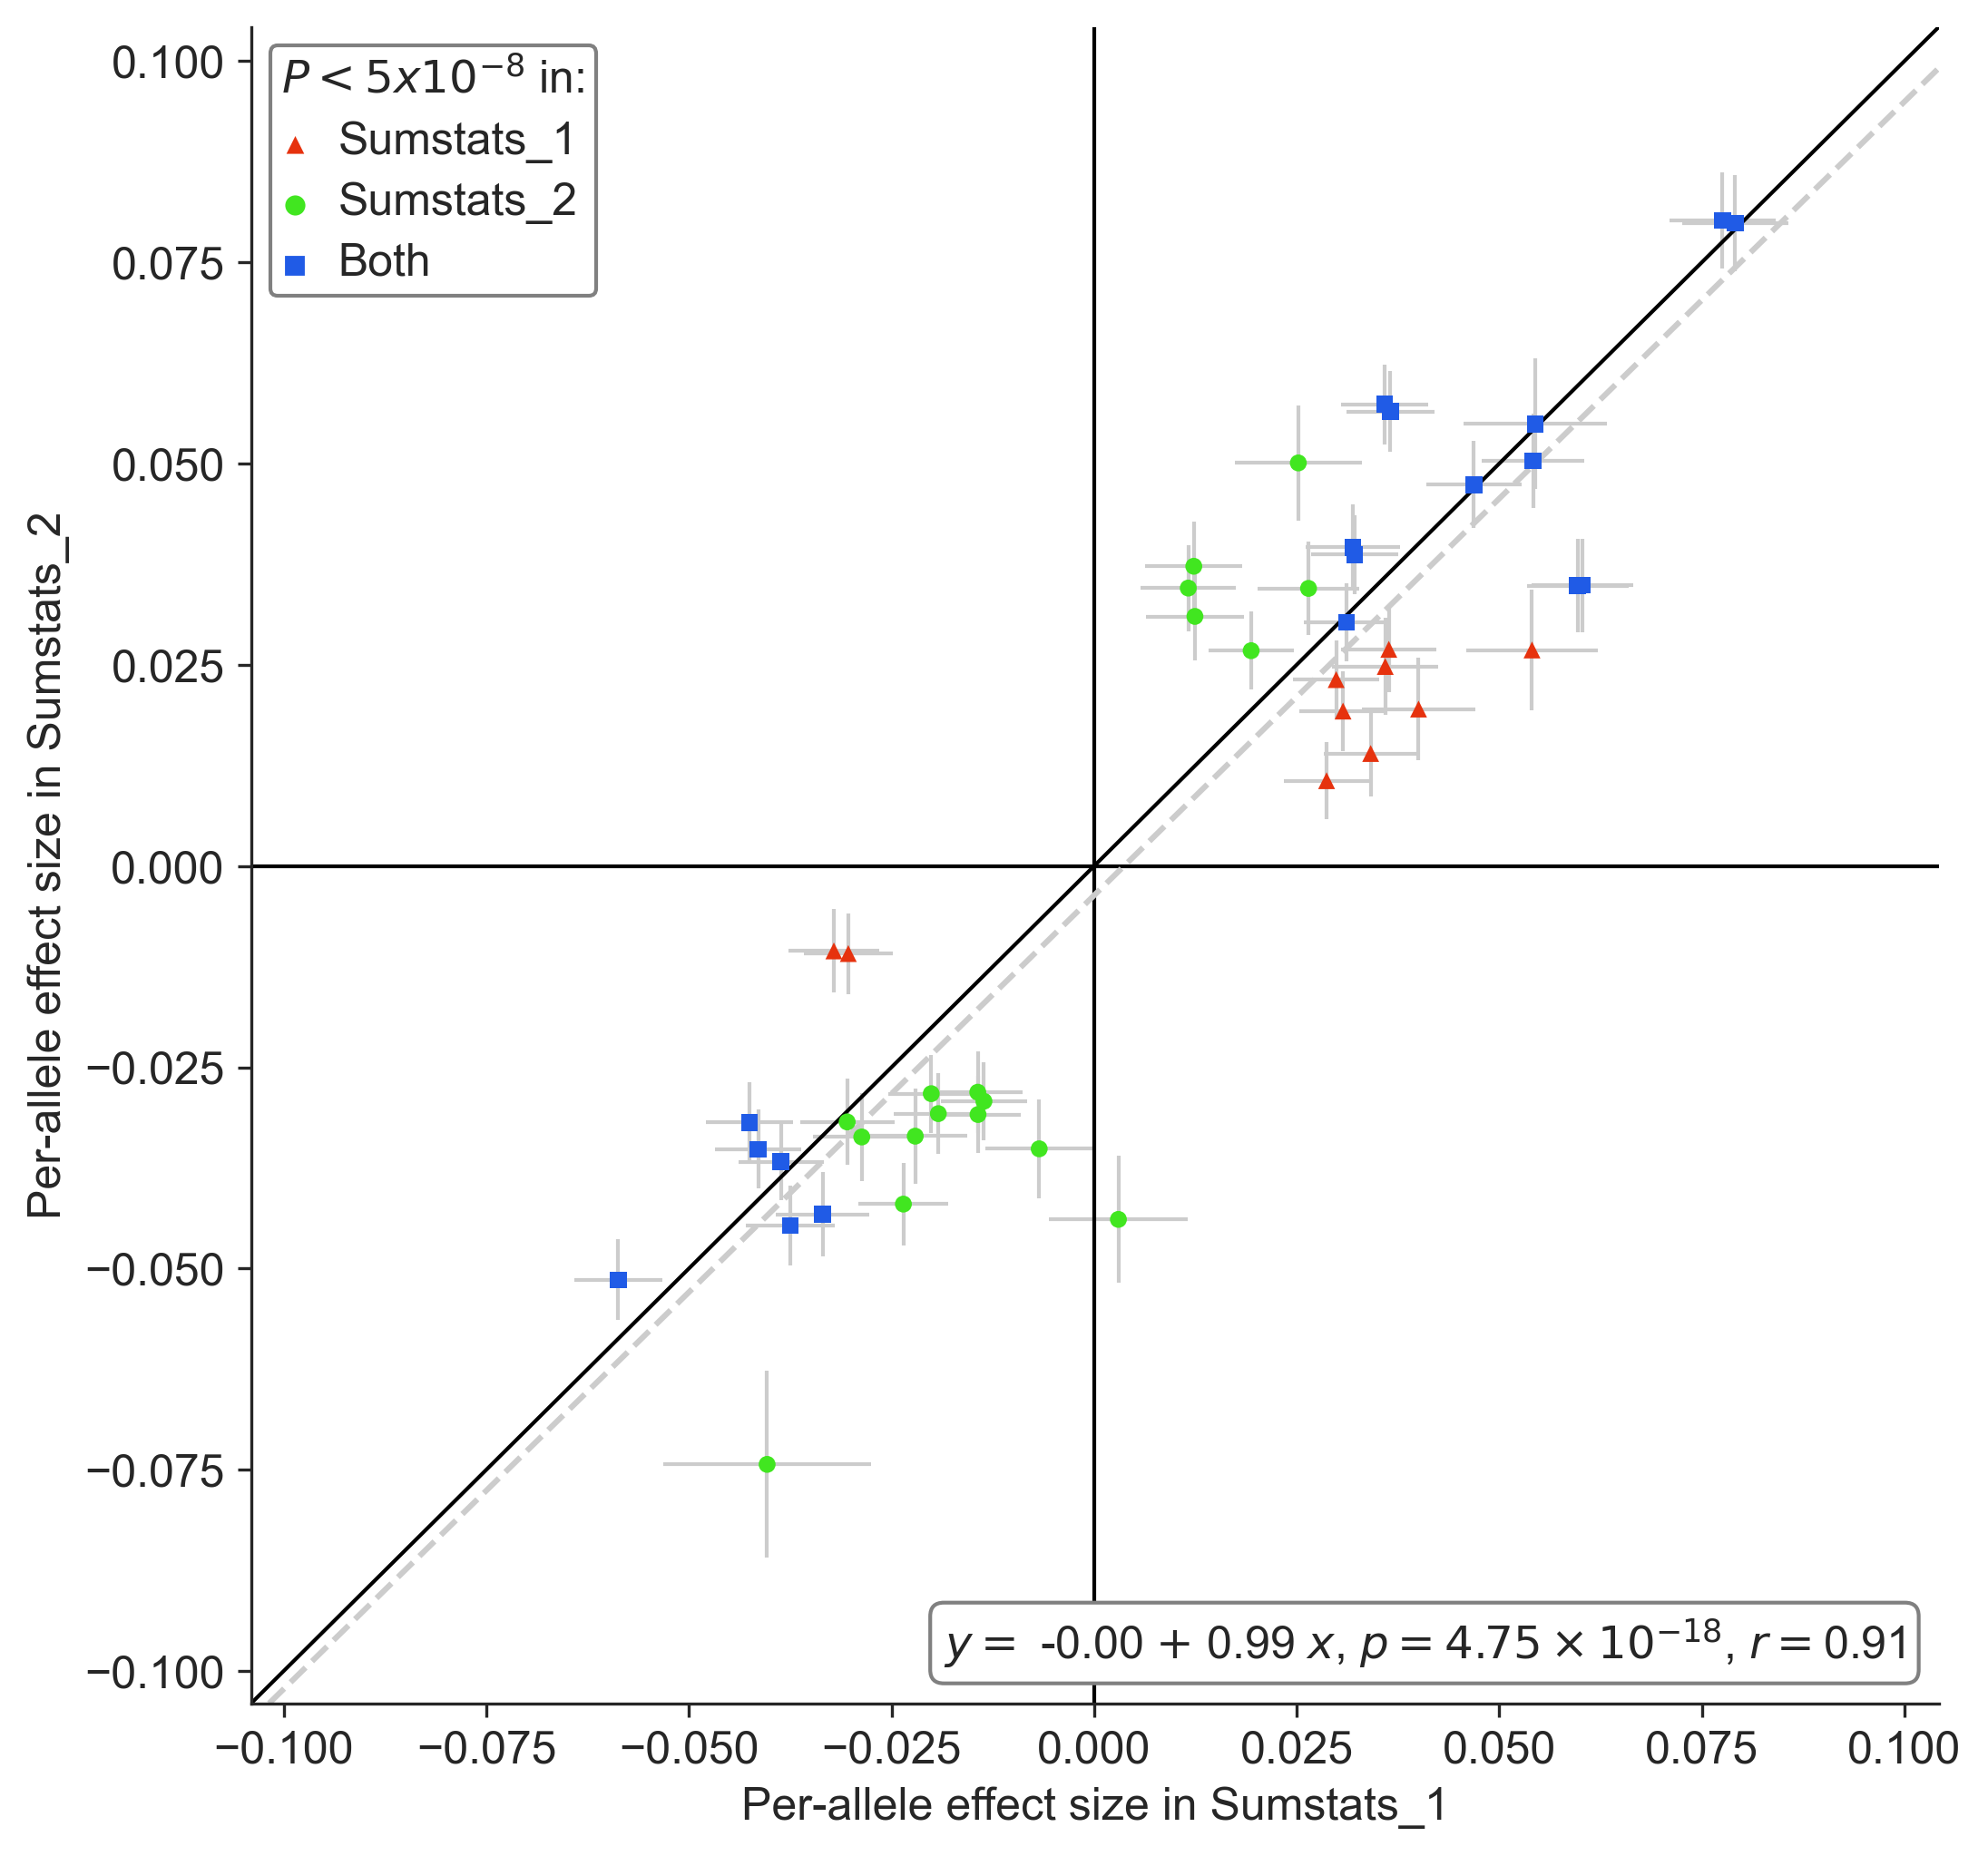

In [2]:
gl1 = gl.Sumstats("bbj_bmi_female.txt.gz",fmt="gwaslab",snpid="SNP",ea="REF",nea="ALT",sep="\t")
gl2 = gl.Sumstats("bbj_bmi_male.txt.gz",fmt="gwaslab",snpid="SNP",ea="REF",nea="ALT",sep="\t")
# auto extract lead SNPs and compare the effect sizes
a = gl.compare_effect(path1= gl1,
                      path2= gl2,
)

### use pd.DataFrame

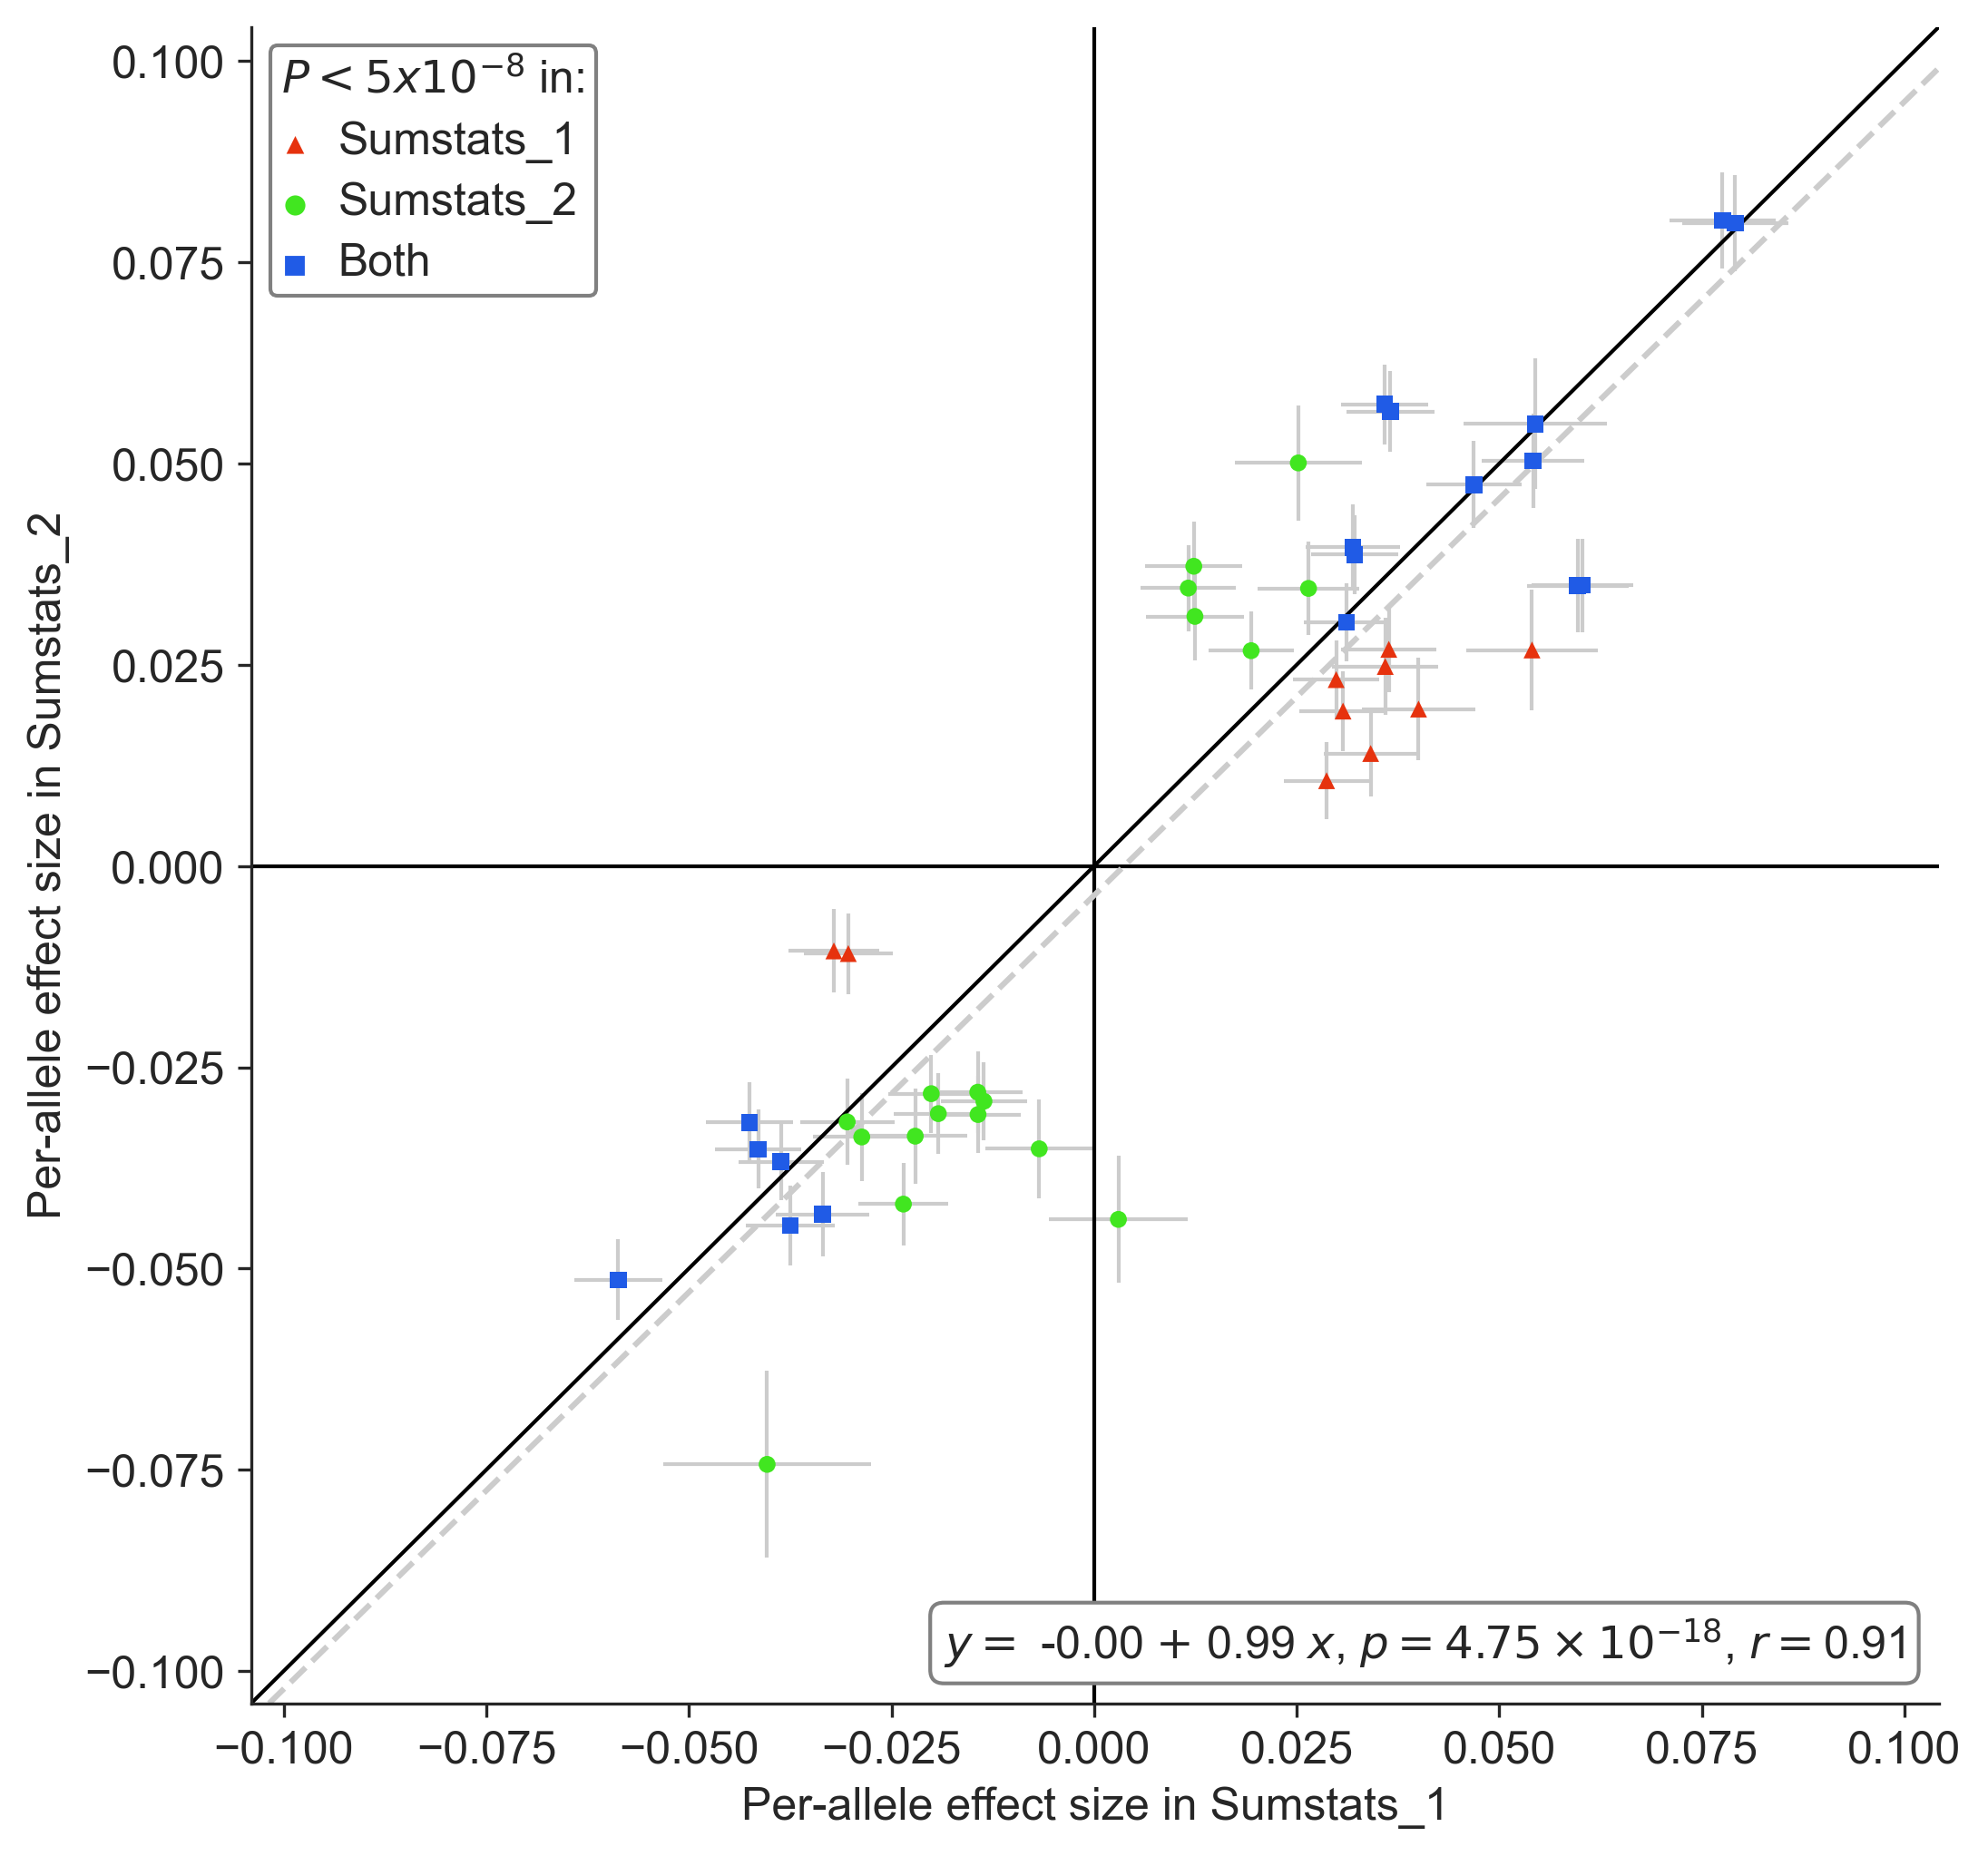

In [3]:
pd1 = pd.read_table("bbj_bmi_female.txt.gz",sep="\t")
pd2 = pd.read_table("bbj_bmi_male.txt.gz",sep="\t")

# cols_name_list should be SNPID, P, Effect Allele, Non-Effect allele, Chromosome and Position
# effect_cols_list should be BETA,SE

a = gl.compare_effect(path1 = pd1,
                      cols_name_list_1 = ["SNP","P","REF","ALT","CHR","POS"],effect_cols_list_1= ["BETA","SE"],
                      path2 = pd2,
                      cols_name_list_2 = ["SNP","P","REF","ALT","CHR","POS"],effect_cols_list_2= ["BETA","SE"]
                      )

### use tabular files

Fri Jun 23 00:45:52 2023 Start to process the raw sumstats for plotting...
Fri Jun 23 00:45:52 2023  -Loading Male SNP list in memory...
Fri Jun 23 00:45:57 2023  -Loading sumstats for Female: SNP,P,CHR,POS
Fri Jun 23 00:46:04 2023  -Counting  variants available for both datasets: 5961600  variants...
Fri Jun 23 00:46:08 2023  -Using only variants available for both datasets...
Fri Jun 23 00:46:08 2023  -Extract lead variants from Female...
Fri Jun 23 00:46:08 2023 Start to extract lead variants...
Fri Jun 23 00:46:08 2023  -Processing 5961600 variants...
Fri Jun 23 00:46:08 2023  -Significance threshold : 5e-06
Fri Jun 23 00:46:08 2023  -Sliding window size: 500  kb
Fri Jun 23 00:46:09 2023  -Found 3455 significant variants in total...
Fri Jun 23 00:46:09 2023  -Identified 66 lead variants!
Fri Jun 23 00:46:09 2023 Finished extracting lead variants successfully!
Fri Jun 23 00:46:09 2023  -Loading sumstats for Male: SNP,P,CHR,POS
Fri Jun 23 00:46:20 2023  -Extract lead snps from Male..

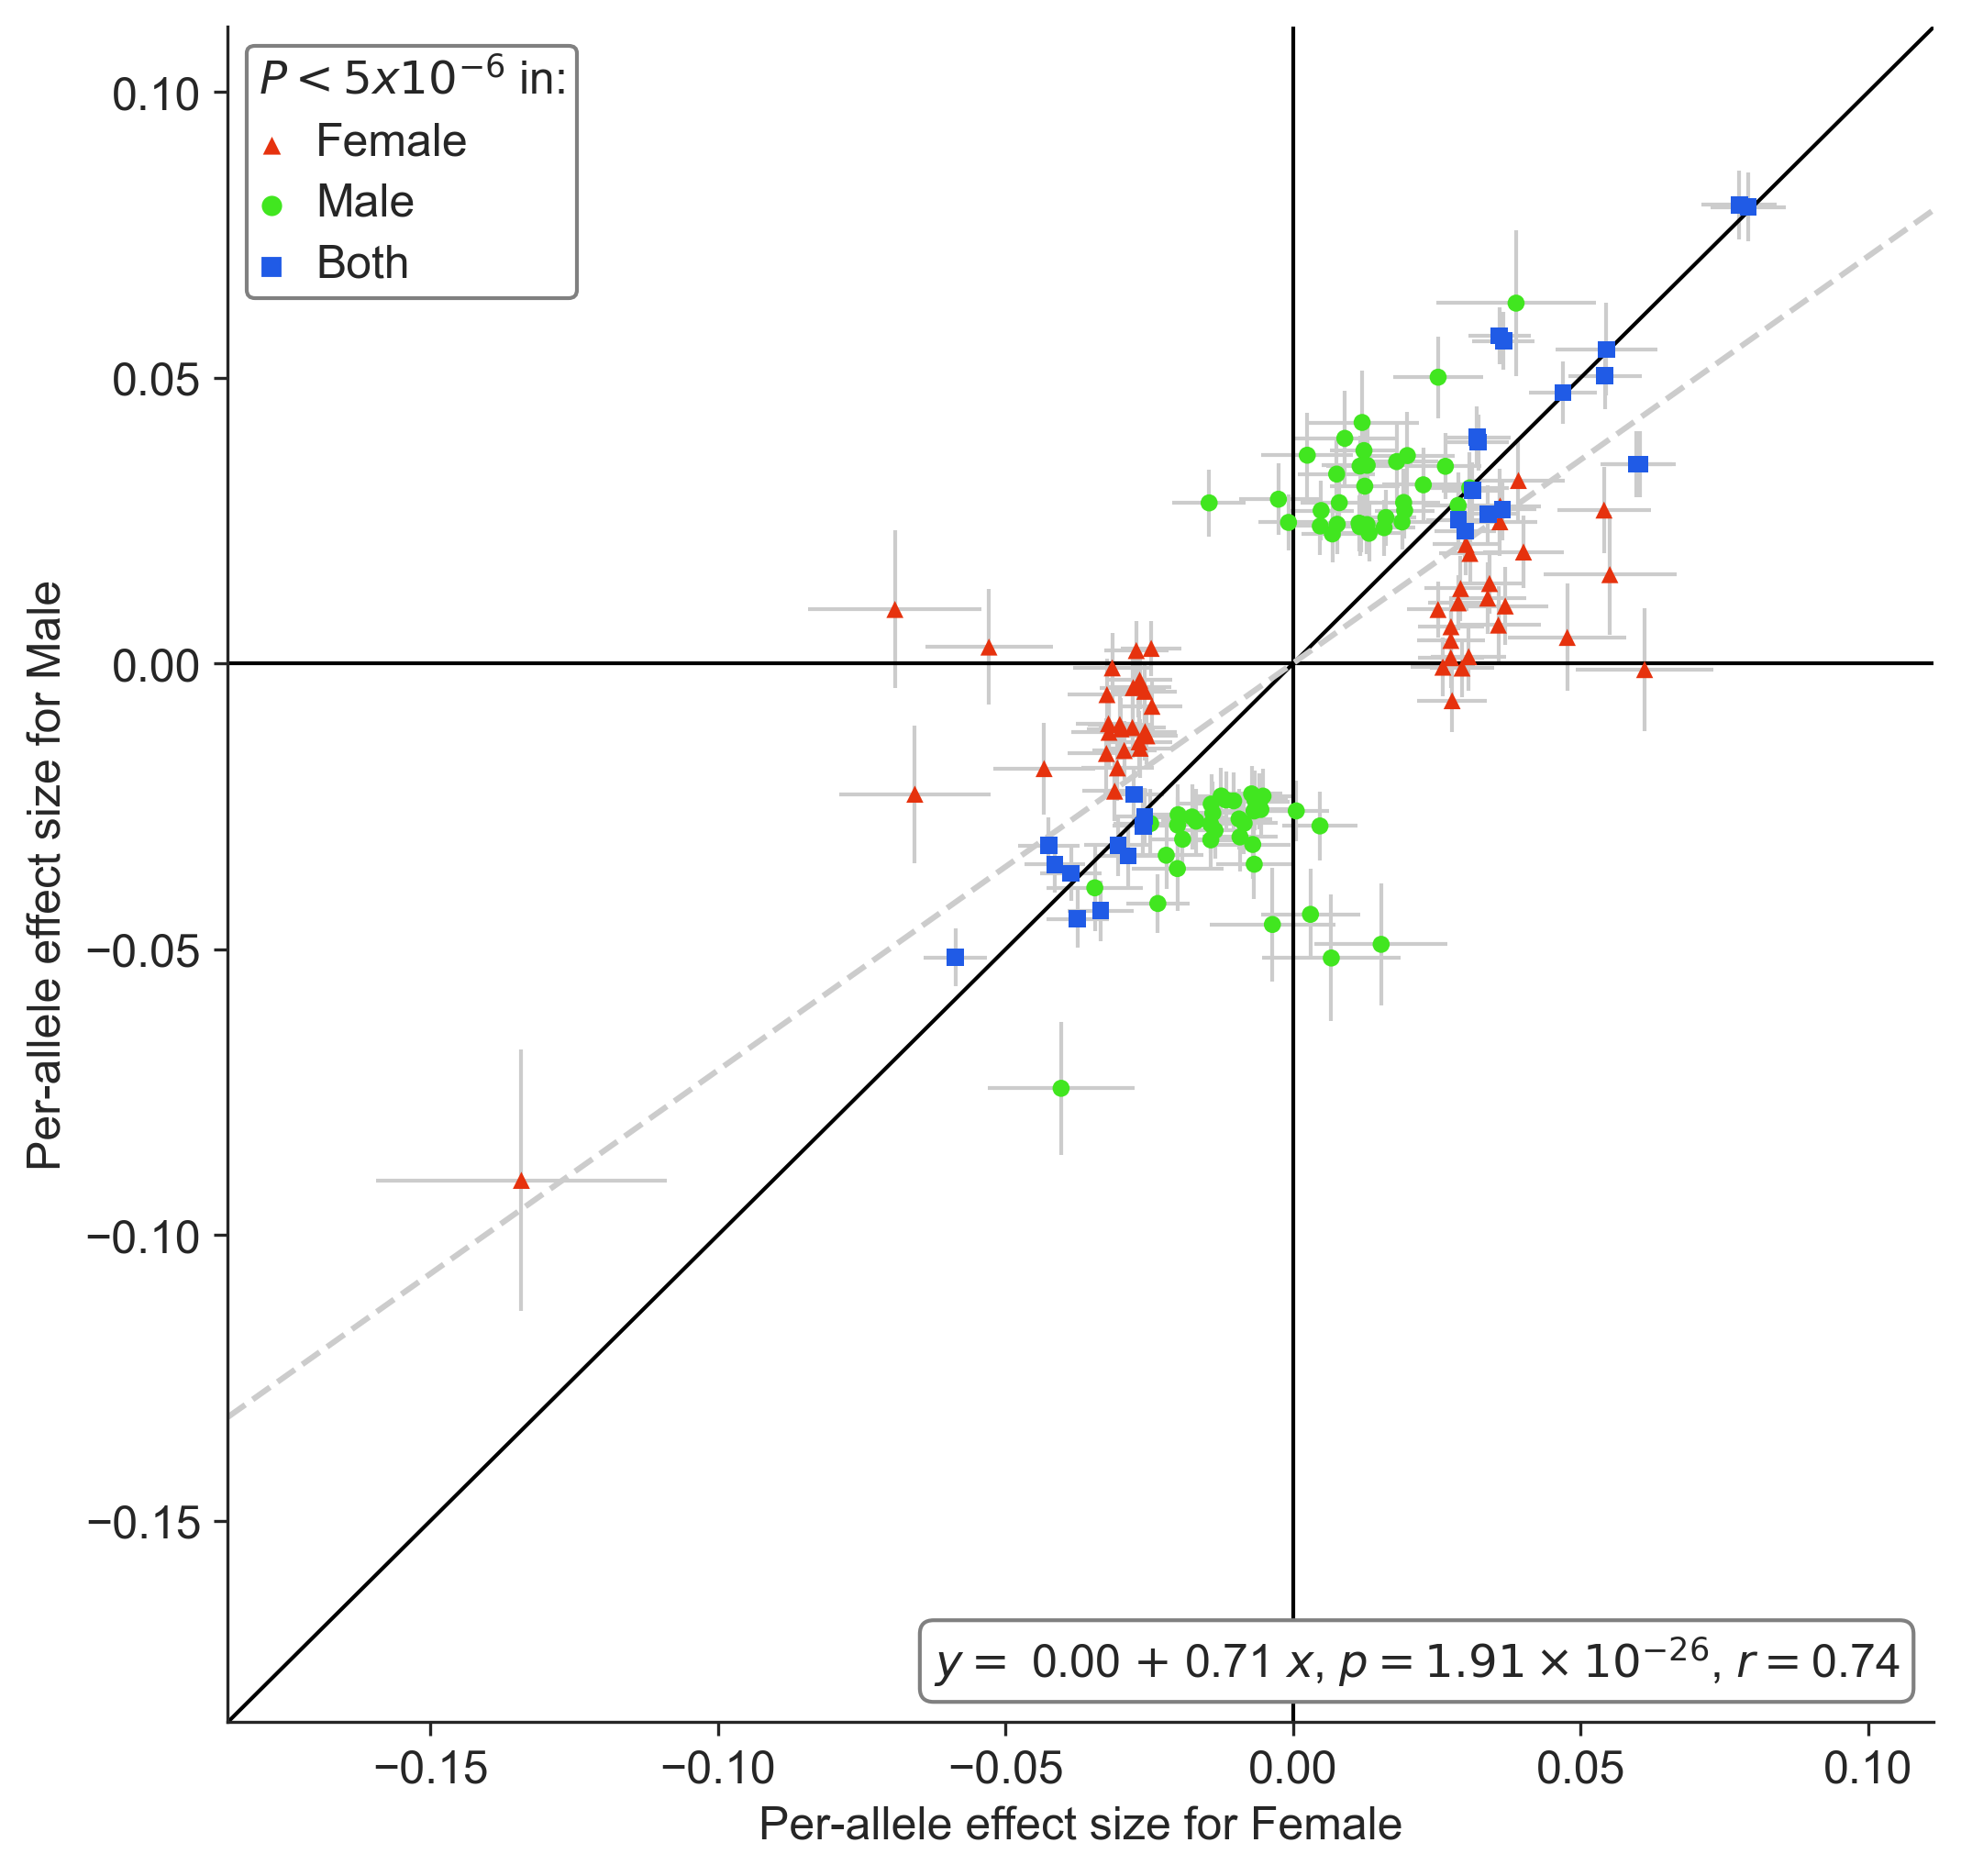

In [4]:
# SNP	CHR	POS	A1	A2	A1Frq	Rsq	BETA	SE	P
# gwaslab will automatically extract significant variants from both sumstats. 
a = gl.compare_effect(path1="bbj_bmi_female.txt.gz",
                      cols_name_list_1=["SNP","P","REF","ALT","CHR","POS"],effect_cols_list_1=["BETA","SE"],
                      path2="bbj_bmi_male.txt.gz",
                      cols_name_list_2=["SNP","P","REF","ALT","CHR","POS"],effect_cols_list_2=["BETA","SE"],
                      label=["Female","Male","Both","None"],
                      xylabel_prefix="Per-allele effect size for ",
                      is_q=False,
                      sig_level=5e-6,
                      legend_title=r'$ P < 5 x 10^{-6}$ in:',
                      verbose=True
)

## OR mode

Fri Jun 23 00:46:53 2023 GWASLab version 3.4.15 https://cloufield.github.io/gwaslab/
Fri Jun 23 00:46:53 2023 (C) 2022-2023, Yunye He, Kamatani Lab, MIT License, gwaslab@gmail.com
Fri Jun 23 00:46:53 2023 Start to load format from formatbook....
Fri Jun 23 00:46:53 2023  -gwaslab format meta info:
Fri Jun 23 00:46:53 2023   - format_name  : gwaslab
Fri Jun 23 00:46:53 2023   - format_source  : https://cloufield.github.io/gwaslab/
Fri Jun 23 00:46:53 2023   - format_version  : 20220729_v3
Fri Jun 23 00:46:53 2023 Start to initiate from file :bbj_bmi_female.txt.gz
Fri Jun 23 00:46:59 2023  -Reading columns          : CHR,BETA,ALT,POS,SNP,P,REF,SE
Fri Jun 23 00:46:59 2023  -Renaming columns to      : CHR,BETA,NEA,POS,SNPID,P,EA,SE
Fri Jun 23 00:46:59 2023  -Current Dataframe shape : 5961600  x  8
Fri Jun 23 00:46:59 2023  -Initiating a status column: STATUS ...
Fri Jun 23 00:47:01 2023 Start to reorder the columns...
Fri Jun 23 00:47:01 2023  -Current Dataframe shape : 5961600  x  9
Fri J

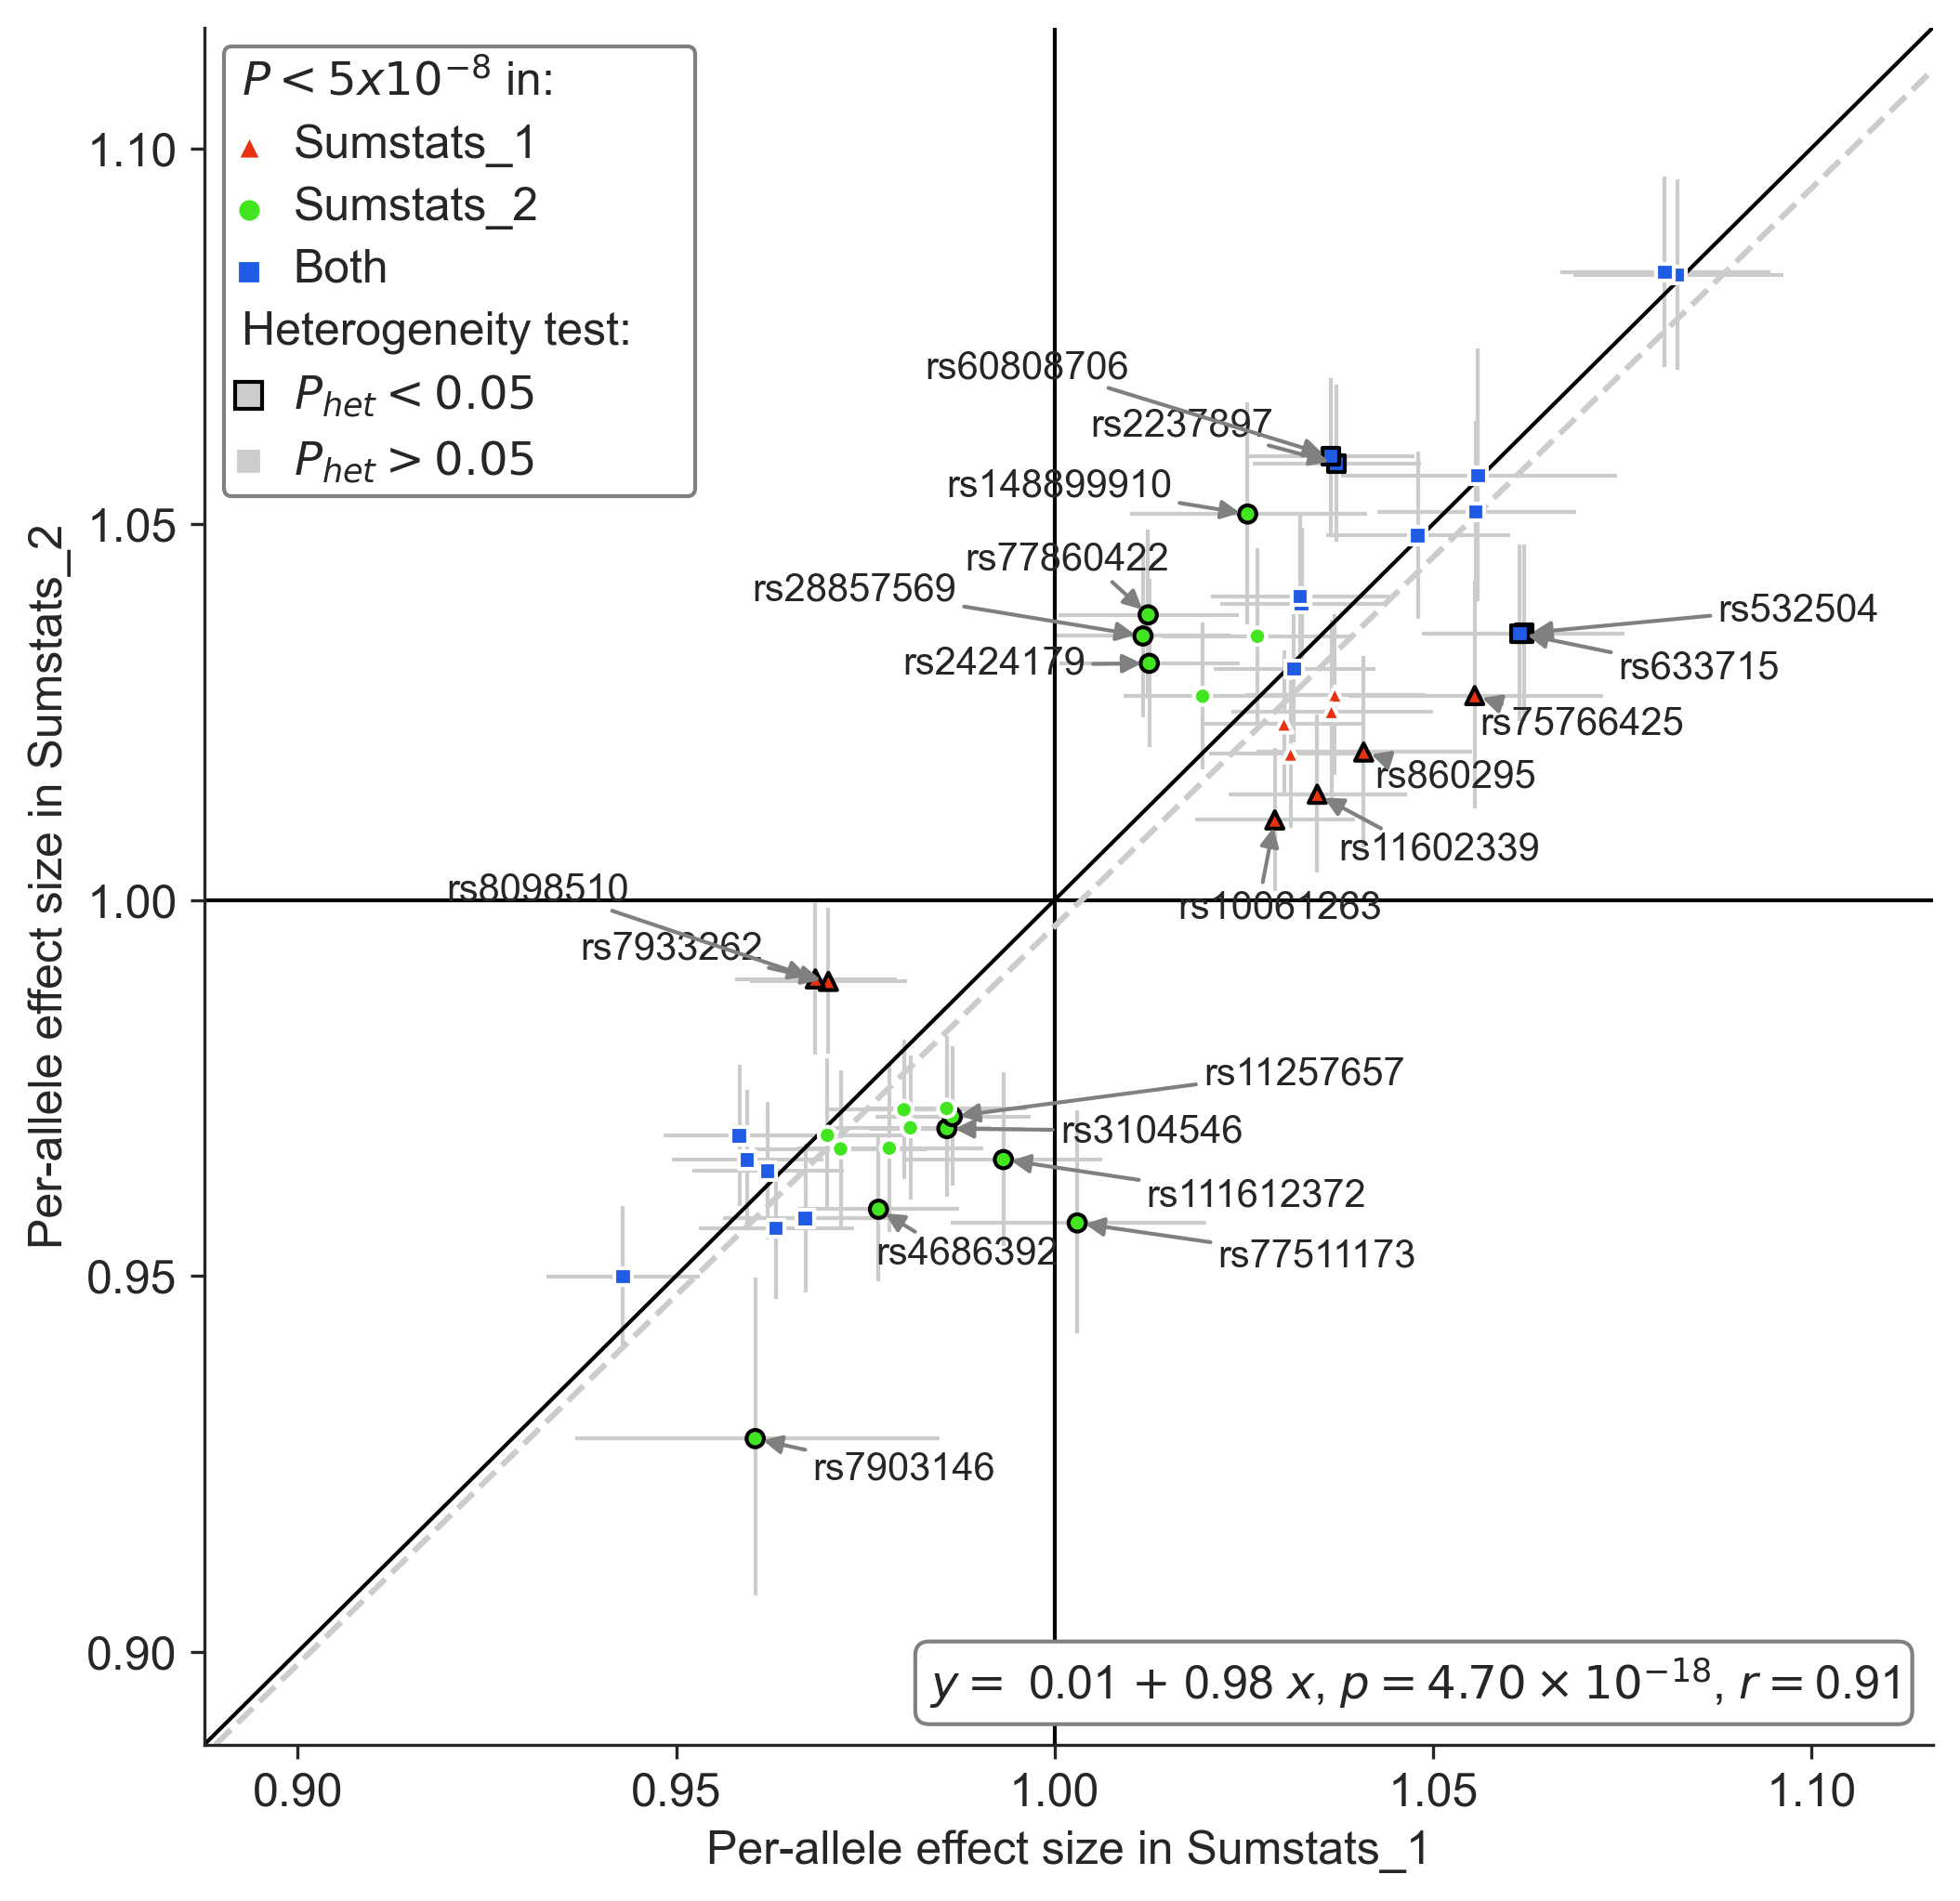

In [5]:
gl1 = gl.Sumstats("bbj_bmi_female.txt.gz",fmt="gwaslab",snpid="SNP",ea="REF",nea="ALT",sep="\t")
gl2 = gl.Sumstats("bbj_bmi_male.txt.gz",fmt="gwaslab",snpid="SNP",ea="REF",nea="ALT",sep="\t")
gl1.fill_data(to_fill=["OR"])
gl2.fill_data(to_fill=["OR"])
# auto extract lead SNPs and compare the effect sizes
a = gl.compare_effect(path1= gl1,
                      path2= gl2,
                      mode="OR",
                      is_q=True,
                      anno=True,
                      anno_het=True,
                      q_level=0.05,
                      verbose=True
)

## Specify the snps you want to check

In [6]:
#randomly extract 15 snps for comparison
# zcat bbj_bmi_female.txt.gz | shuf -n 25 | cut -f 1

In [7]:
# store them in a list
snps = [
"rs1863794",
"rs78031431",
"rs2065160",
"rs79873757",
"rs76557076",
"rs75763355",
"rs73465683",
"rs7259784",
"rs12752457",
"rs1984969",
"rs4598662",
"rs36013795",
"rs7411446",
"rs3785568",
"rs13850768",
"rs77247065",
"rs7718738",
"rs74800130",
"rs79767381",
"rs6544774",
"rs245902",
"rs7994403",
"rs79658166",
"rs6822158",
"rs73442063"
]

## Creating comparison plot using beta and se of specified variants

Fri Jun 23 00:47:42 2023 Start to process the raw sumstats for plotting...
Fri Jun 23 00:47:42 2023  -Loading Male SNP list in memory...
Fri Jun 23 00:47:47 2023  -Loading sumstats for Female: SNP,P
Fri Jun 23 00:47:54 2023  -Counting  variants available for both datasets: 5961600  variants...
Fri Jun 23 00:47:58 2023  -Using only variants available for both datasets...
Fri Jun 23 00:47:58 2023  -Extract variants in the given list from Female...
Fri Jun 23 00:47:58 2023  -Loading sumstats for Male: SNP,P
Fri Jun 23 00:48:08 2023  -Extract snps in the given list from Male...
Fri Jun 23 00:48:09 2023 Merging snps from Female and Male...
Fri Jun 23 00:48:09 2023  -Extract statistics of selected variants from Female :  SNP,P,REF,ALT,BETA,SE
Fri Jun 23 00:48:14 2023  -Merging Female effect information...
Fri Jun 23 00:48:17 2023  -Extract statistics of selected variants from Male :  SNP,P,REF,ALT,BETA,SE
Fri Jun 23 00:48:23 2023  -Merging Male effect information...
Fri Jun 23 00:48:26 2023 

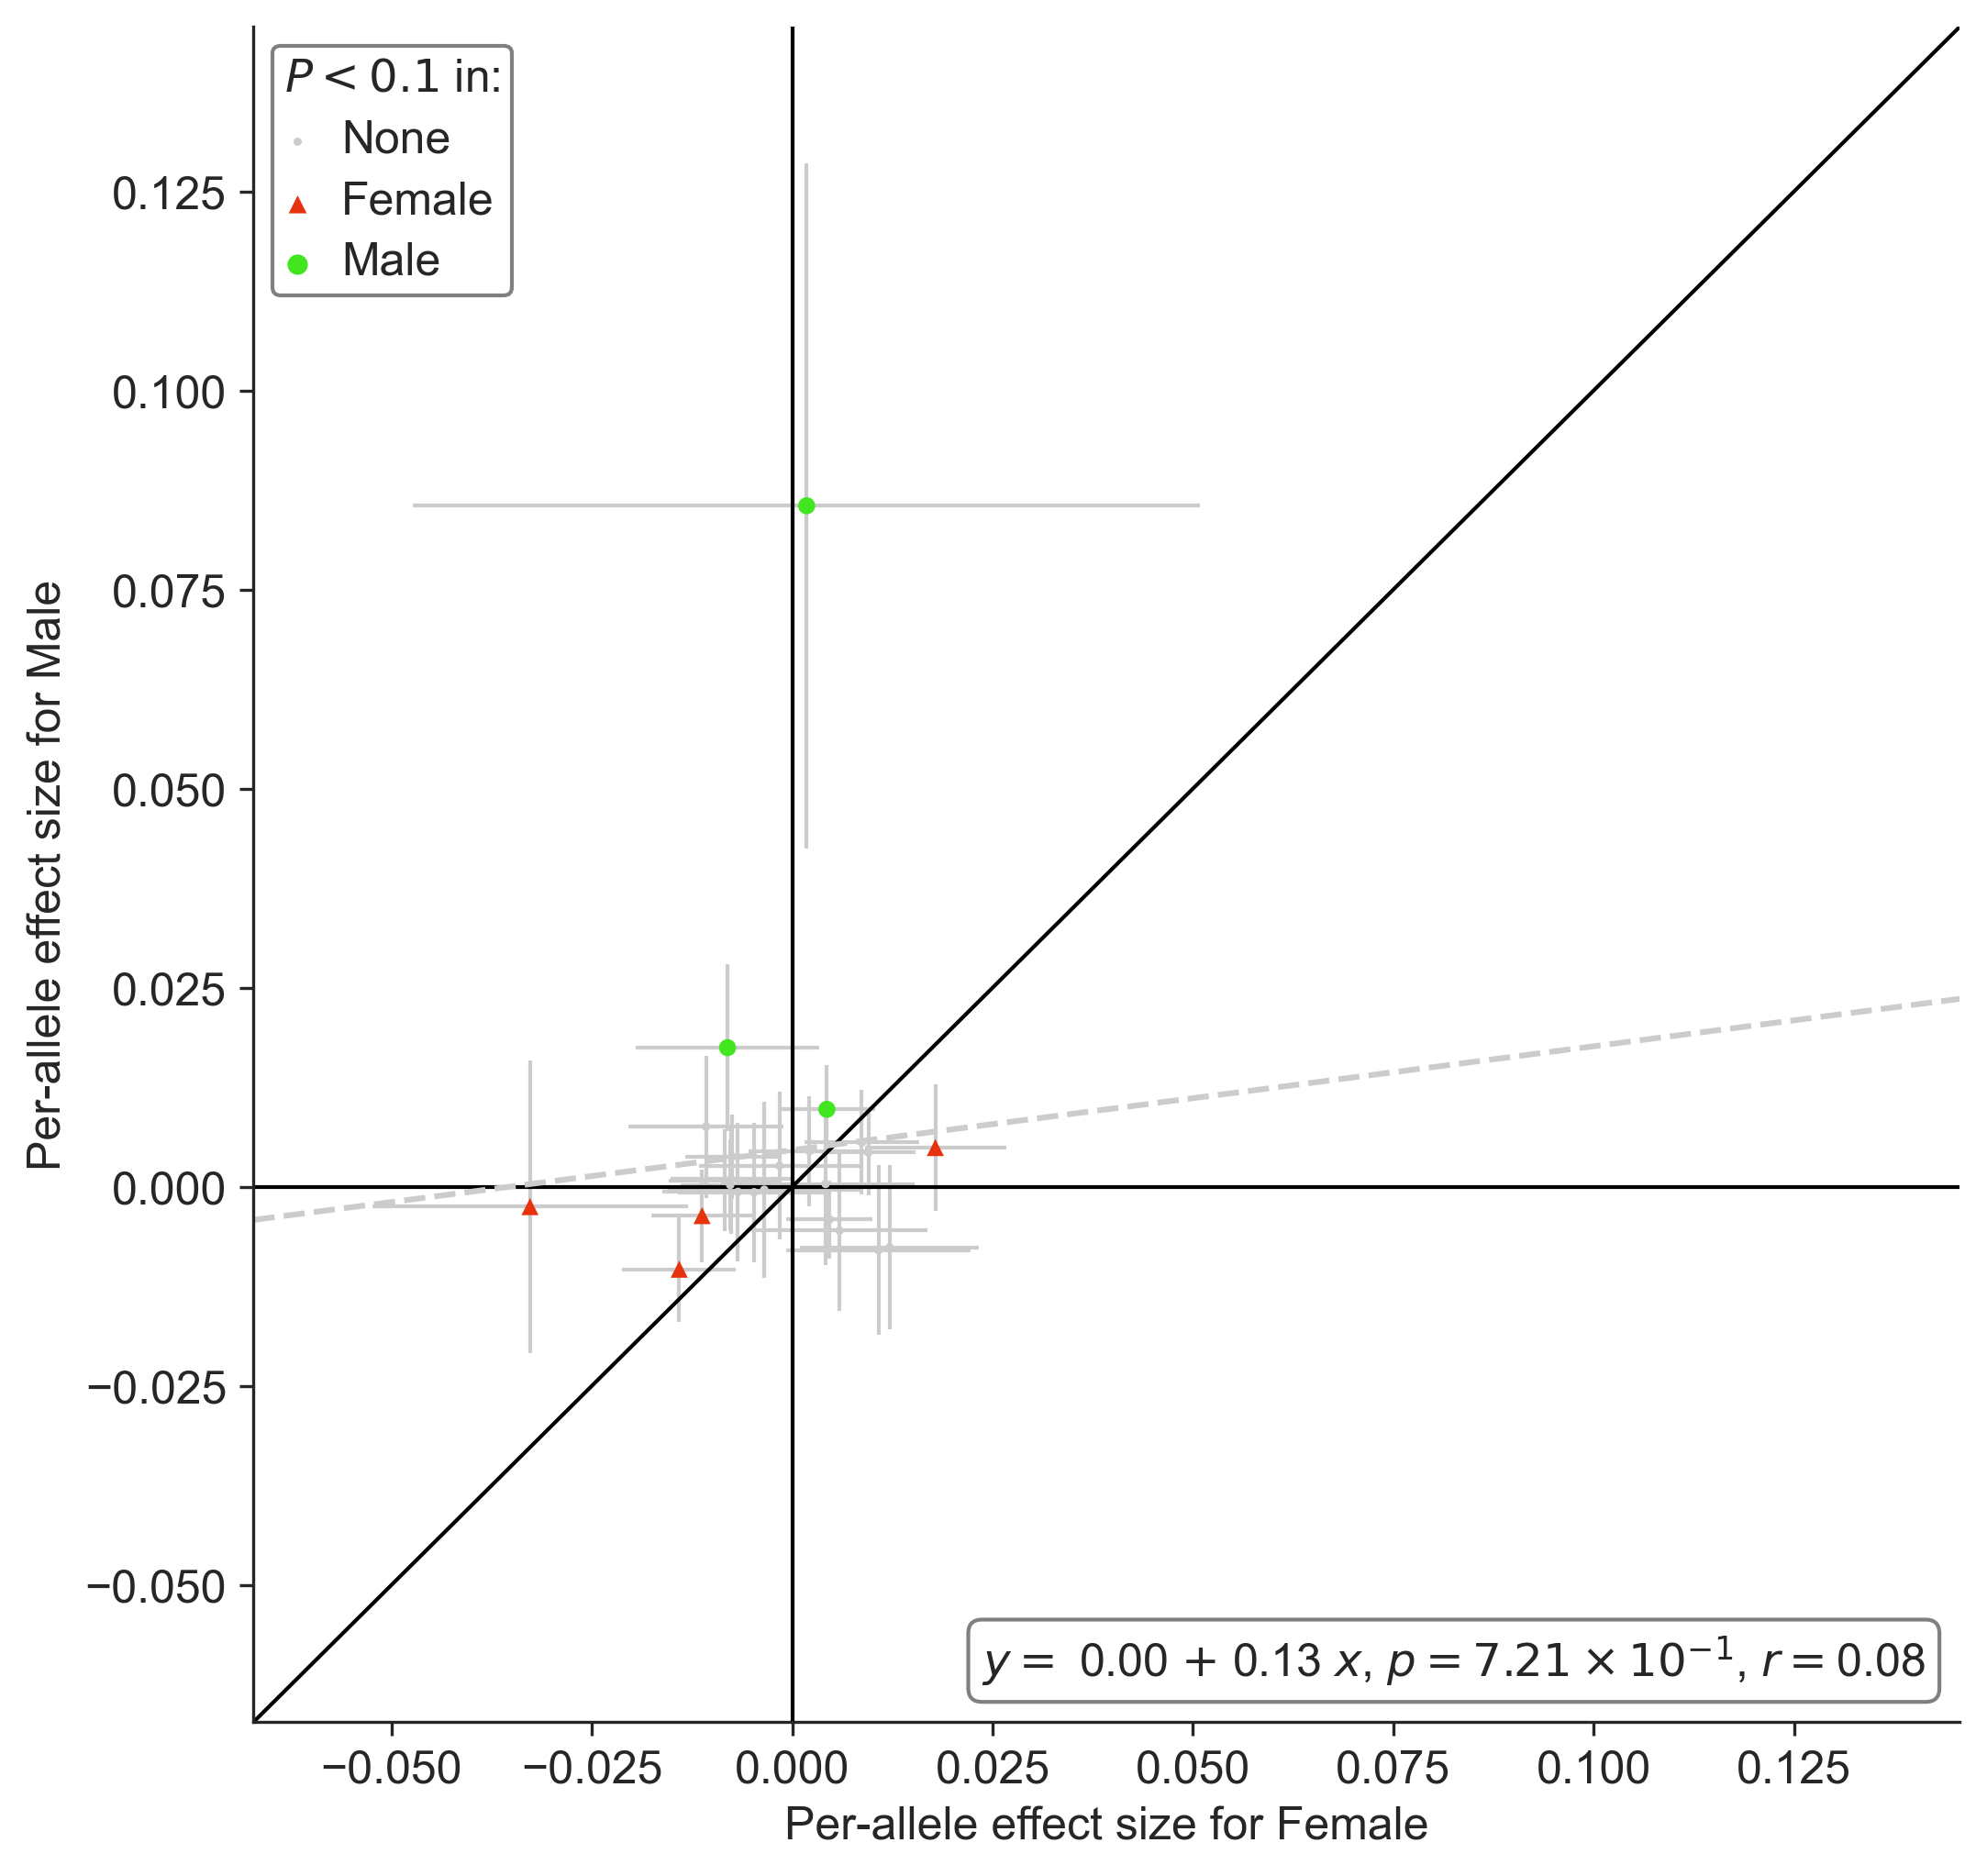

In [8]:
# SNP	CHR	POS	A1	A2	A1Frq	Rsq	BETA	SE	P
a = gl.compare_effect(path1="bbj_bmi_female.txt.gz",
                      cols_name_list_1=["SNP","P","REF","ALT","CHR","POS"],effect_cols_list_1=["BETA","SE"],
                      path2="bbj_bmi_male.txt.gz",
                      cols_name_list_2=["SNP","P","REF","ALT","CHR","POS"],effect_cols_list_2=["BETA","SE"],
                      label=["Female","Male","Both","None"],
                      xylabel_prefix="Per-allele effect size for ",
                      sig_level=0.1,
                      legend_title=r'$ P < 0.1$ in:',
                      snplist=snps,
                      verbose=True
)

## Check raw data

In [9]:
#data
a[0]

,P_1,P_2,EA_1,NEA_1,EFFECT_1,SE_1,EA_2,NEA_2,EFFECT_2,SE_2,indicator,EA_2_aligned,NEA_2_aligned,EFFECT_2_aligned
SNPID,,,,,,,,,,,,,,
rs12752457,0.04261,0.53740,G,A,0.017860,0.008810,G,A,0.004928,0.007991,1,G,A,0.004928
rs1863794,0.38560,0.40490,C,T,0.004661,0.005372,C,T,-0.004097,0.004919,0,C,T,-0.004097
rs1984969,0.22880,0.90250,A,G,-0.008401,0.006981,A,G,0.000782,0.006386,0,A,G,0.000782
rs2065160,0.21280,0.96720,A,G,-0.007738,0.006211,A,G,0.000236,0.005732,0,A,G,0.000236
rs245902,0.10370,0.41980,T,A,0.009501,0.005838,T,A,0.004318,0.005352,0,T,A,0.004318
rs36013795,0.19560,0.47450,C,T,-0.007498,0.005794,C,T,0.003788,0.005296,0,C,T,0.003788
rs3785568,0.61490,0.93730,T,C,-0.004761,0.009462,T,C,-0.000689,0.008758,0,T,C,-0.000689
rs4598662,0.30970,0.89010,A,G,-0.007636,0.007517,A,G,0.000945,0.006843,0,A,G,0.000945
rs6544774,0.27650,0.46020,G,A,0.012160,0.011170,G,A,-0.007611,0.010310,0,G,A,-0.007611


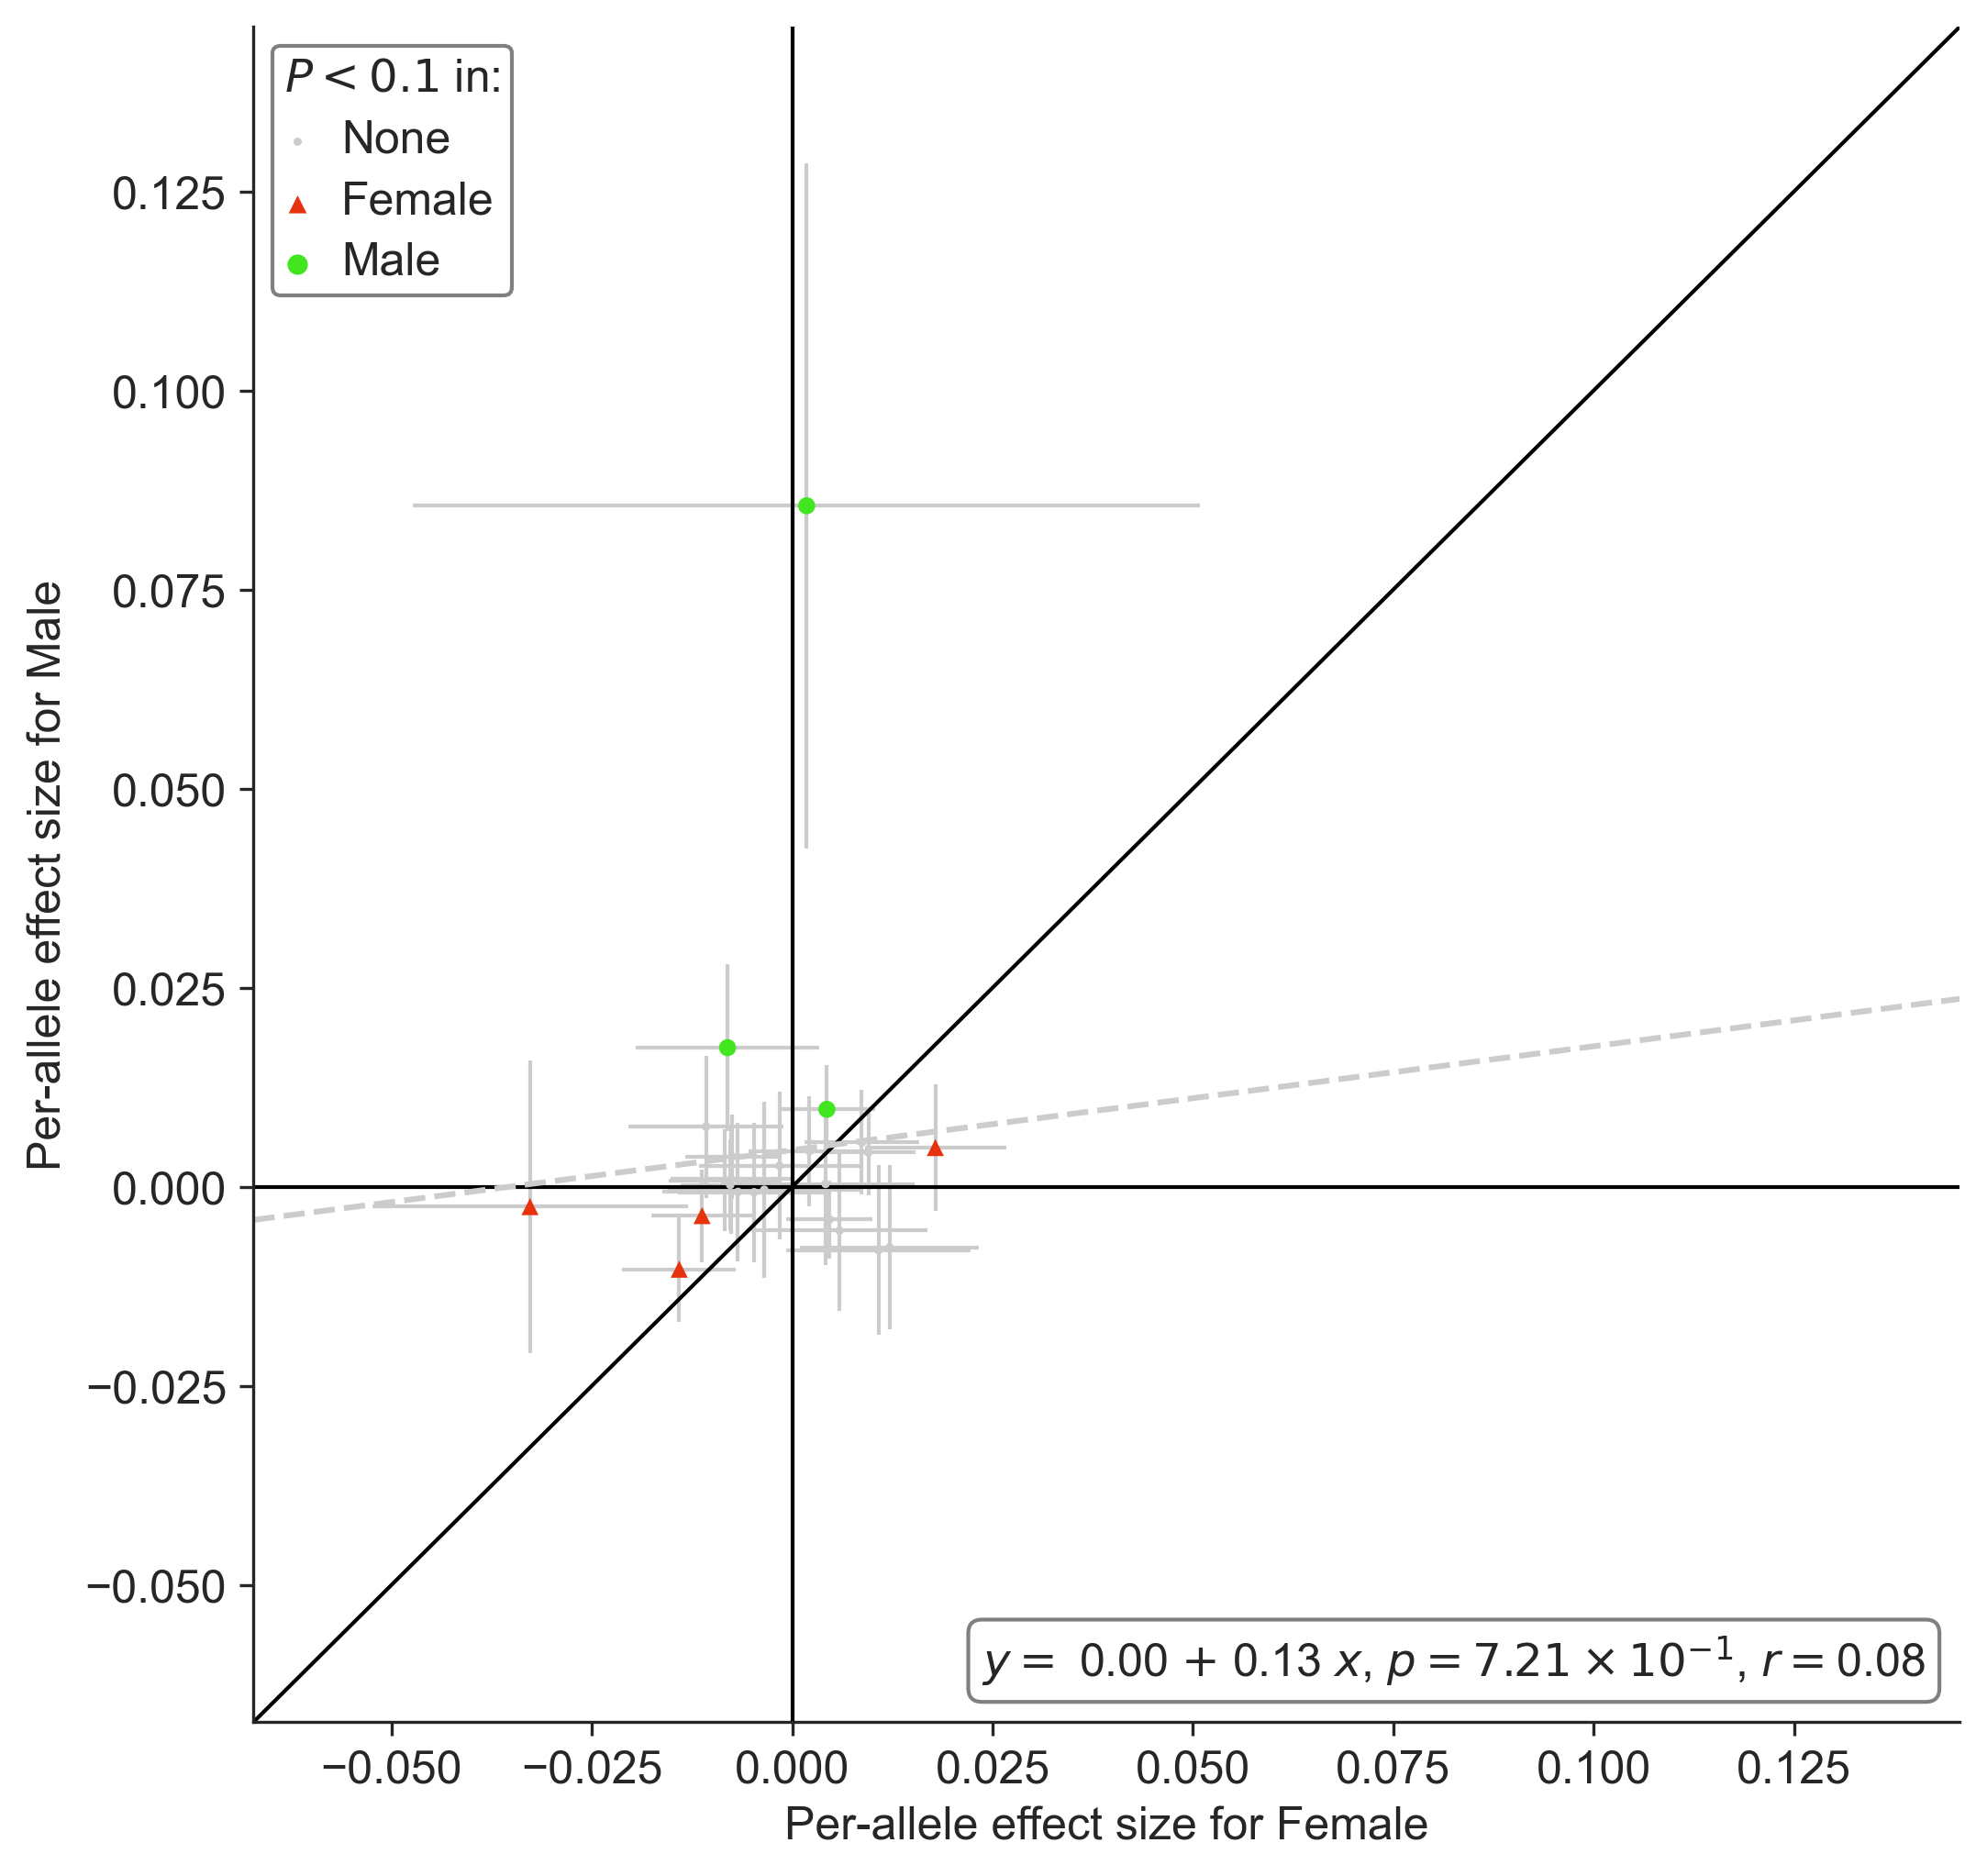

In [10]:
#figure
a[1]

In [11]:
#log
a[2]

# heterogeneity test

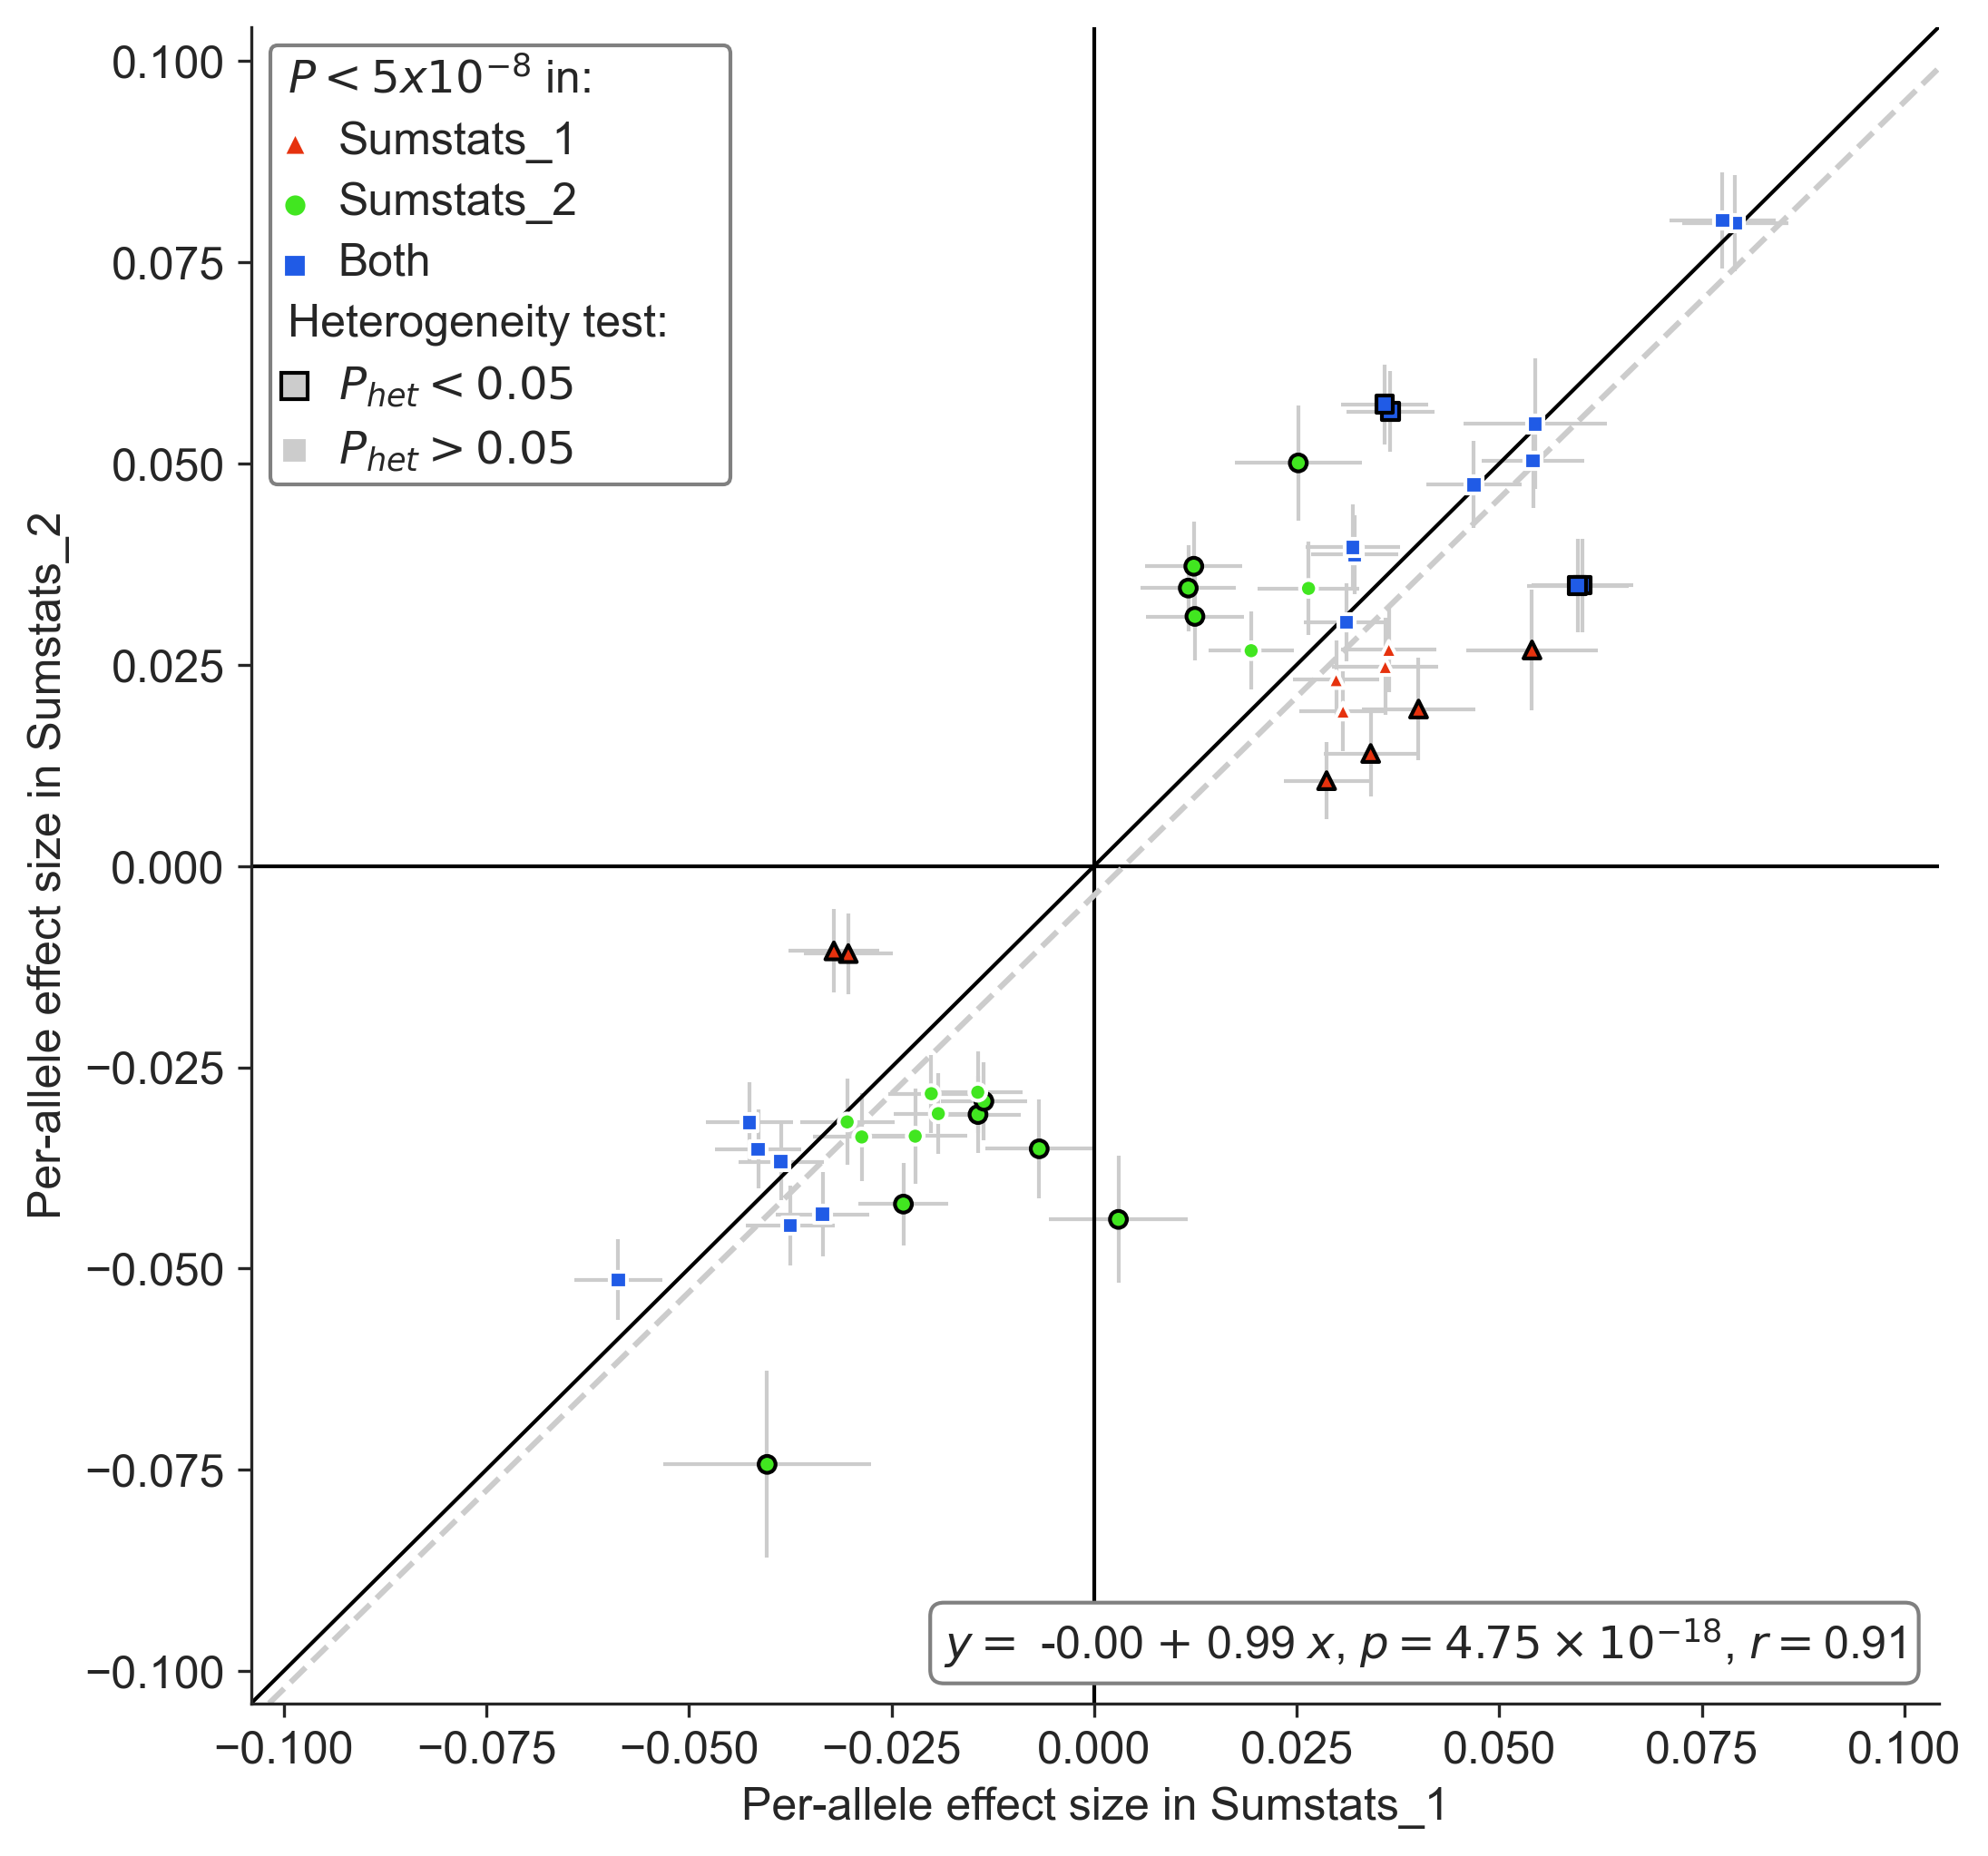

In [12]:
pd1 = pd.read_table("bbj_bmi_female.txt.gz",sep="\t")
pd2 = pd.read_table("bbj_bmi_male.txt.gz",sep="\t")

# cols_name_list should be SNPID, P, Effect Allele, Non-Effect allele, Chromosome and Position
# effect_cols_list should be BETA,SE

a = gl.compare_effect(path1 = pd1,
                      cols_name_list_1 = ["SNP","P","REF","ALT","CHR","POS"],effect_cols_list_1= ["BETA","SE"],
                      path2 = pd2,
                      cols_name_list_2 = ["SNP","P","REF","ALT","CHR","POS"],effect_cols_list_2= ["BETA","SE"],
                      is_q=True,
                      q_level=0.05,
                      legend_mode="full"
                      )

Fri Jun 23 00:49:21 2023 Start to process the raw sumstats for plotting...
Fri Jun 23 00:49:21 2023  -Loading Male SNP list in memory...
Fri Jun 23 00:49:26 2023  -Loading sumstats for Female: SNP,P,CHR,POS
Fri Jun 23 00:49:33 2023  -Counting  variants available for both datasets: 5961600  variants...
Fri Jun 23 00:49:37 2023  -Using only variants available for both datasets...
Fri Jun 23 00:49:37 2023  -Extract lead variants from Female...
Fri Jun 23 00:49:37 2023 Start to extract lead variants...
Fri Jun 23 00:49:37 2023  -Processing 5961600 variants...
Fri Jun 23 00:49:37 2023  -Significance threshold : 5e-08
Fri Jun 23 00:49:37 2023  -Sliding window size: 500  kb
Fri Jun 23 00:49:38 2023  -Found 948 significant variants in total...
Fri Jun 23 00:49:38 2023  -Identified 20 lead variants!
Fri Jun 23 00:49:38 2023 Finished extracting lead variants successfully!
Fri Jun 23 00:49:38 2023  -Loading sumstats for Male: SNP,P,CHR,POS
Fri Jun 23 00:49:49 2023  -Extract lead snps from Male...

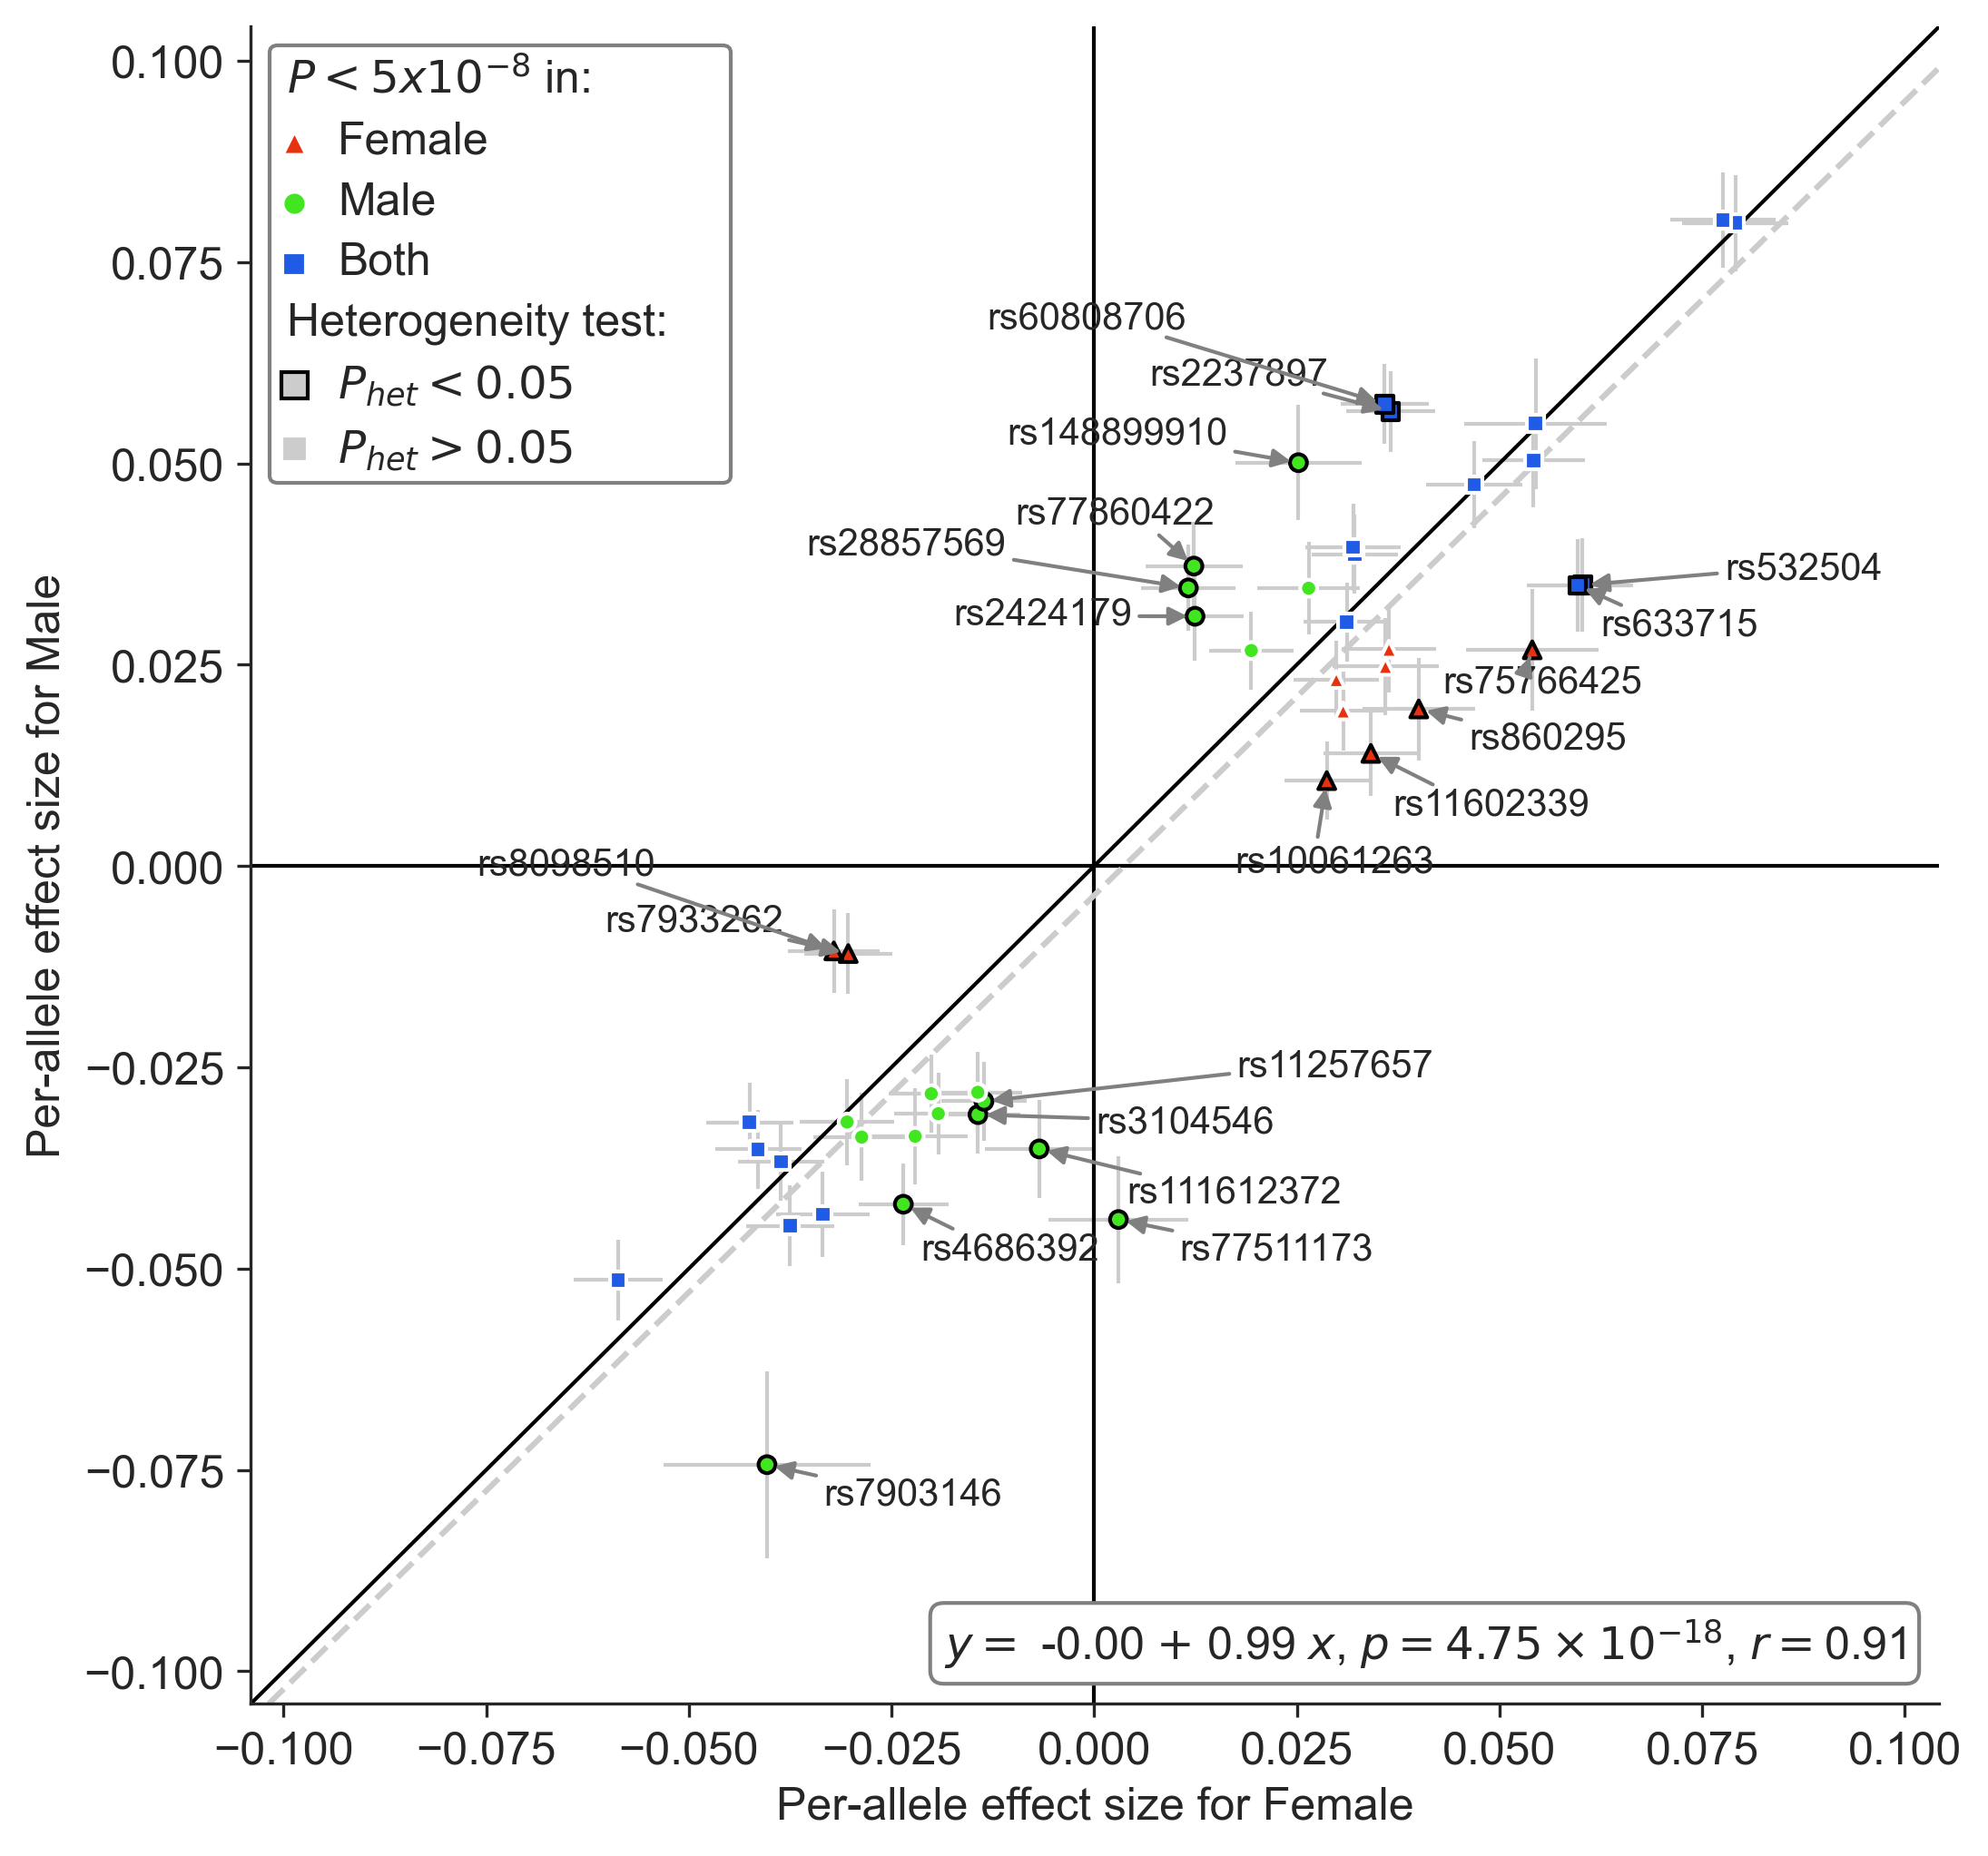

In [13]:
# r_se=True : estimate the se for R using jackknife method
a = gl.compare_effect(path1="bbj_bmi_female.txt.gz",
                      cols_name_list_1=["SNP","P","REF","ALT","CHR","POS"],effect_cols_list_1=["BETA","SE"],
                      path2="bbj_bmi_male.txt.gz",
                      cols_name_list_2=["SNP","P","REF","ALT","CHR","POS"],effect_cols_list_2=["BETA","SE"],
                      label=["Female","Male","Both","None"],
                      xylabel_prefix="Per-allele effect size for ",
                      anno=True,
                      anno_diff=0.015,
                      is_q=True,
                      q_level=0.05,
                      anno_het=True,
                      sig_level=5e-8,
                      legend_title=r'$ P < 5 x 10^{-8}$ in:',
                      verbose=True
)

# annotate

Fri Jun 23 00:50:25 2023 Start to process the raw sumstats for plotting...
Fri Jun 23 00:50:25 2023  -Loading Male SNP list in memory...
Fri Jun 23 00:50:31 2023  -Loading sumstats for Female: SNP,P,CHR,POS
Fri Jun 23 00:50:37 2023  -Counting  variants available for both datasets: 5961600  variants...
Fri Jun 23 00:50:41 2023  -Using only variants available for both datasets...
Fri Jun 23 00:50:41 2023  -Extract lead variants from Female...
Fri Jun 23 00:50:41 2023 Start to extract lead variants...
Fri Jun 23 00:50:41 2023  -Processing 5961600 variants...
Fri Jun 23 00:50:41 2023  -Significance threshold : 5e-08
Fri Jun 23 00:50:41 2023  -Sliding window size: 500  kb
Fri Jun 23 00:50:42 2023  -Found 948 significant variants in total...
Fri Jun 23 00:50:42 2023  -Identified 20 lead variants!
Fri Jun 23 00:50:42 2023 Finished extracting lead variants successfully!
Fri Jun 23 00:50:43 2023  -Loading sumstats for Male: SNP,P,CHR,POS
Fri Jun 23 00:50:53 2023  -Extract lead snps from Male...

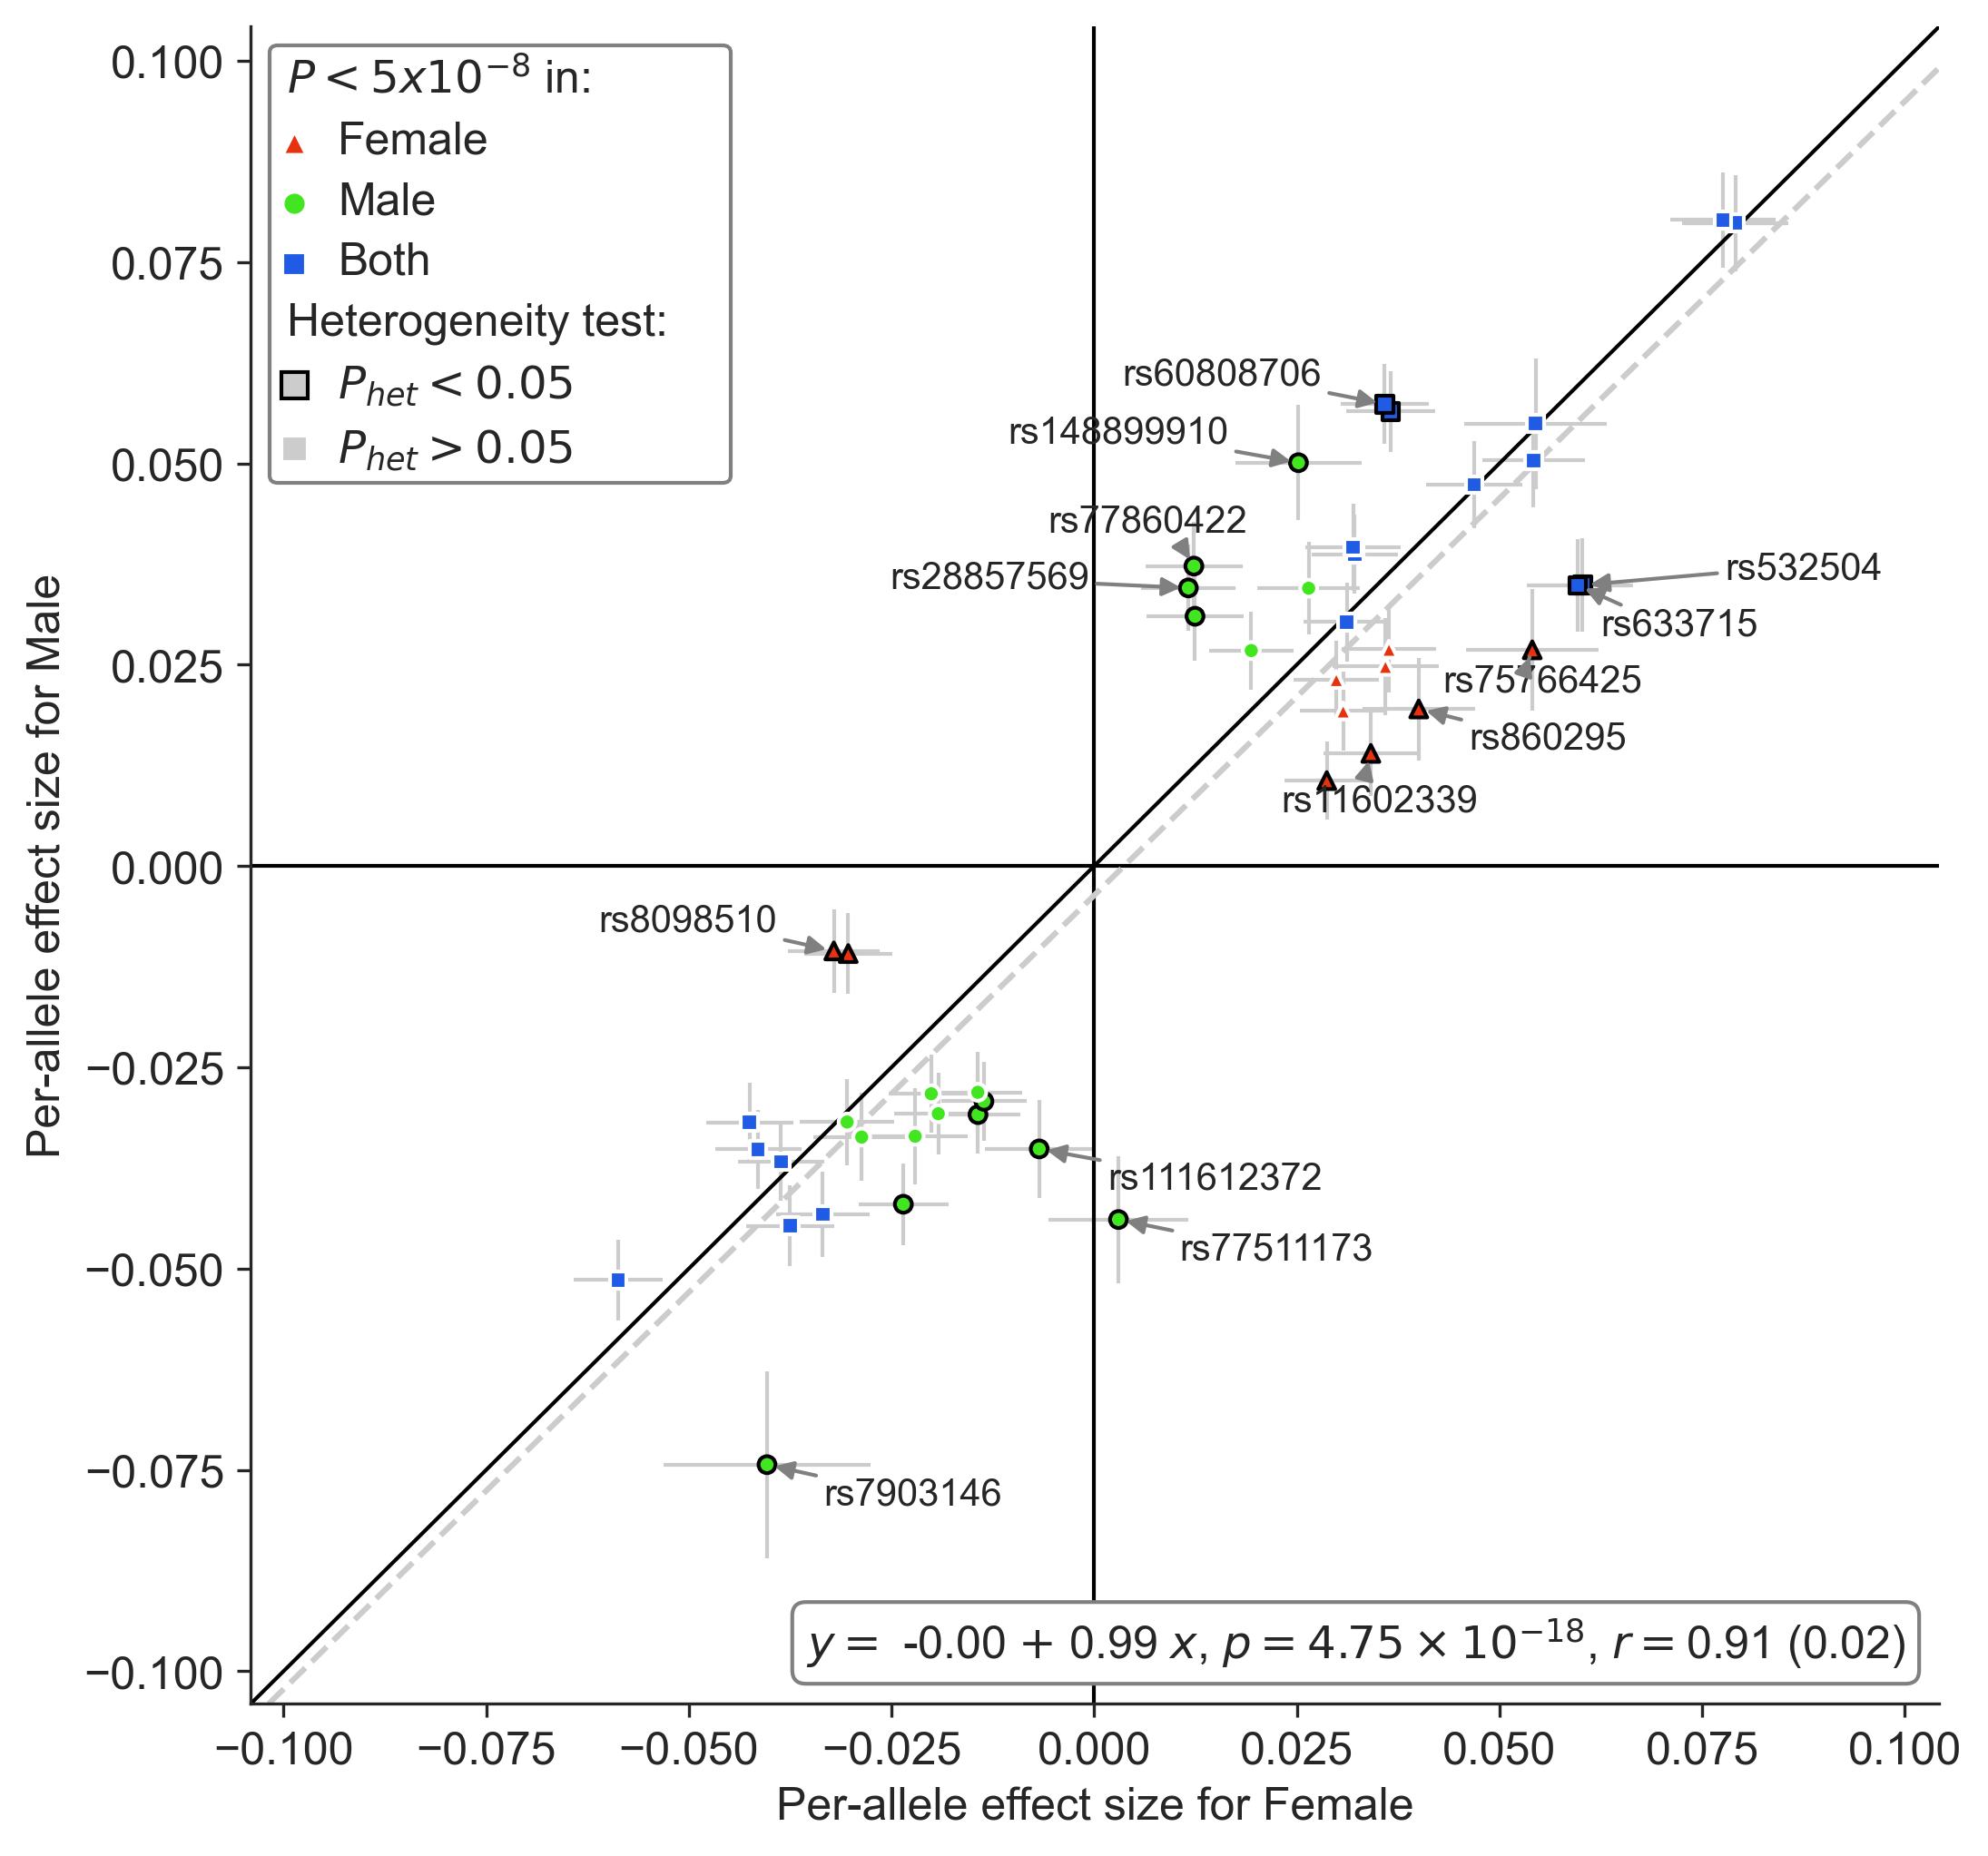

In [14]:
# r2_se=True : estimate the se for R2 using jackknife method
a = gl.compare_effect(path1="bbj_bmi_female.txt.gz",
                      cols_name_list_1=["SNP","P","REF","ALT","CHR","POS"],effect_cols_list_1=["BETA","SE"],
                      path2="bbj_bmi_male.txt.gz",
                      cols_name_list_2=["SNP","P","REF","ALT","CHR","POS"],effect_cols_list_2=["BETA","SE"],
                      label=["Female","Male","Both","None"],
                      xylabel_prefix="Per-allele effect size for ",
                      r_se=True,
                      is_q=True,
                      anno=True,
                      anno_het=True,
                      anno_diff=0.02,
                      sig_level=5e-8,
                      legend_title=r'$ P < 5 x 10^{-8}$ in:',
                      verbose=True
)

# save

Fri Jun 23 00:51:28 2023 Start to process the raw sumstats for plotting...
Fri Jun 23 00:51:28 2023  -Loading Male SNP list in memory...
Fri Jun 23 00:51:34 2023  -Loading sumstats for Female: SNP,P,CHR,POS
Fri Jun 23 00:51:40 2023  -Counting  variants available for both datasets: 5961600  variants...
Fri Jun 23 00:51:44 2023  -Using only variants available for both datasets...
Fri Jun 23 00:51:44 2023  -Extract lead variants from Female...
Fri Jun 23 00:51:44 2023 Start to extract lead variants...
Fri Jun 23 00:51:44 2023  -Processing 5961600 variants...
Fri Jun 23 00:51:44 2023  -Significance threshold : 5e-08
Fri Jun 23 00:51:44 2023  -Sliding window size: 500  kb
Fri Jun 23 00:51:45 2023  -Found 948 significant variants in total...
Fri Jun 23 00:51:45 2023  -Identified 20 lead variants!
Fri Jun 23 00:51:45 2023 Finished extracting lead variants successfully!
Fri Jun 23 00:51:46 2023  -Loading sumstats for Male: SNP,P,CHR,POS
Fri Jun 23 00:51:56 2023  -Extract lead snps from Male...

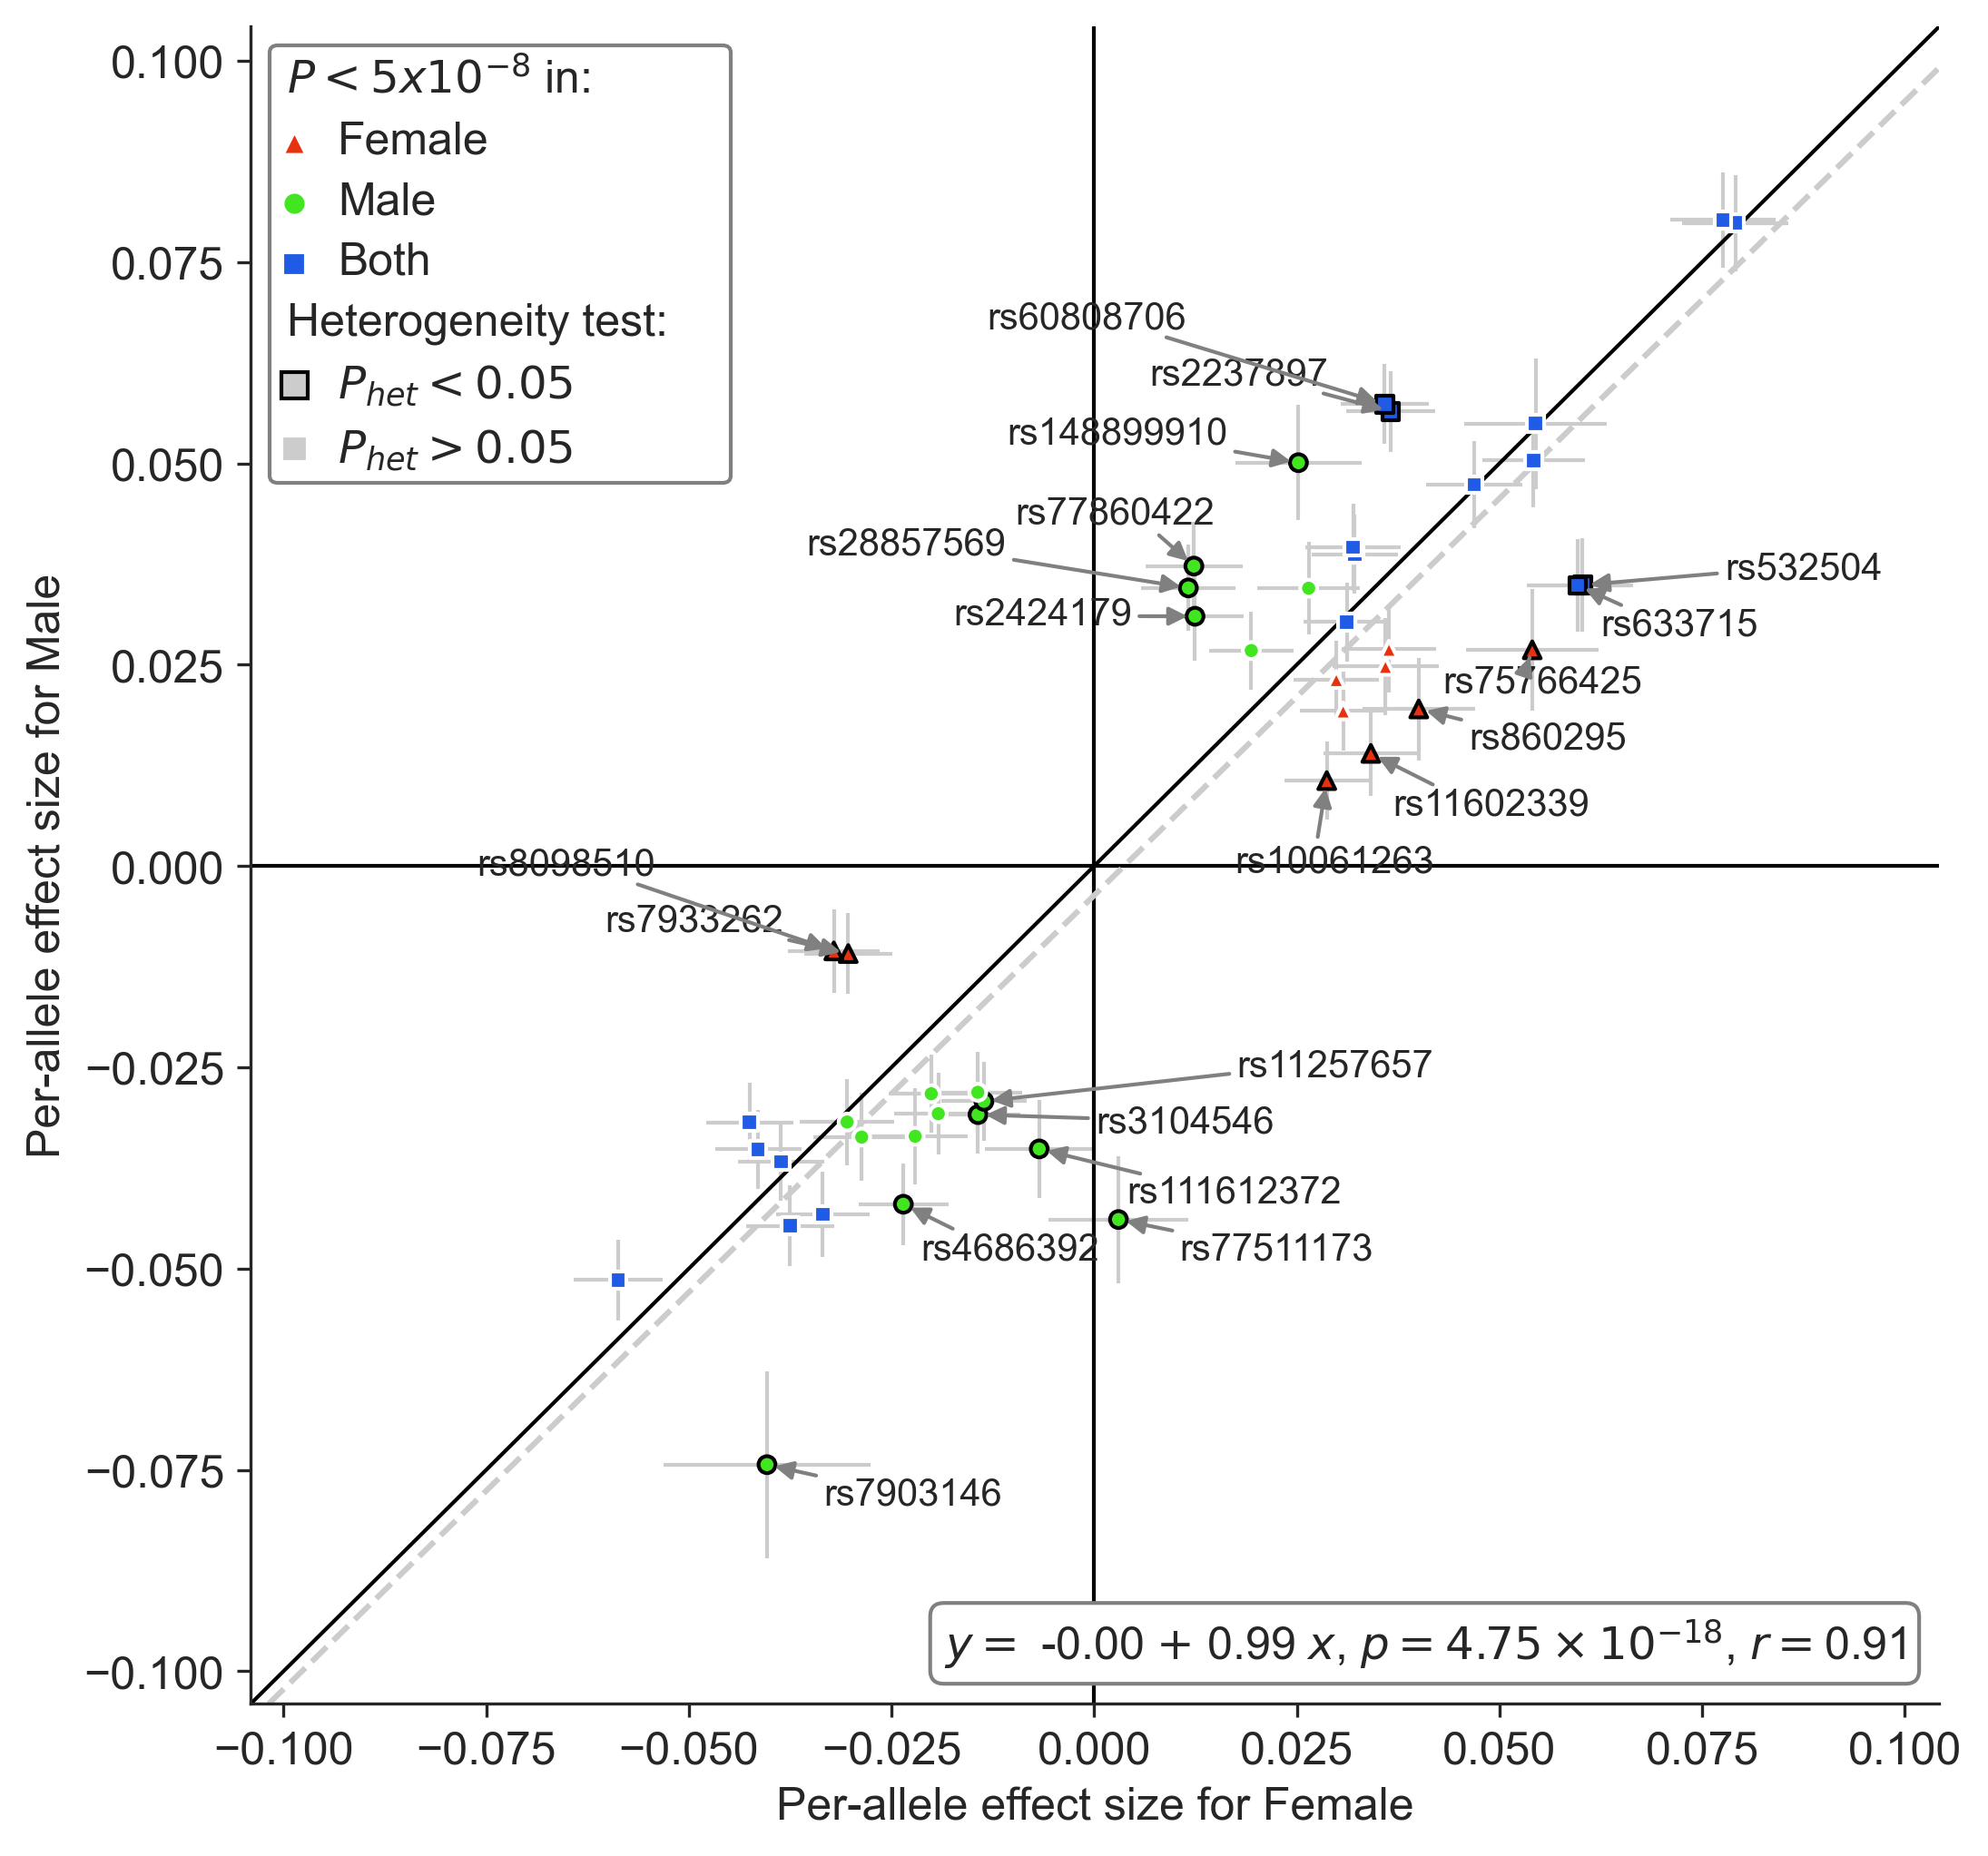

In [15]:
a = gl.compare_effect(path1="bbj_bmi_female.txt.gz",
                      cols_name_list_1=["SNP","P","REF","ALT","CHR","POS"],effect_cols_list_1=["BETA","SE"],
                      path2="bbj_bmi_male.txt.gz",
                      cols_name_list_2=["SNP","P","REF","ALT","CHR","POS"],effect_cols_list_2=["BETA","SE"],
                      label=["Female","Male","Both","None"],
                      xylabel_prefix="Per-allele effect size for ",
                      anno=True,
                      anno_het=True,
                      anno_diff=0.015,
                      allele_match=True,
                      sig_level=5e-8,
                      legend_title=r'$ P < 5 x 10^{-8}$ in:',
                      verbose=True,
                      save = "myplot.png",
                      saveargs= {"dpi":300,"facecolor":"white"}
)